<h1>TRABAJO PRACTICO Nº2: Respuesta al Impulso, análisis espectral y muestreo</h1>
<h2>Universidad Nacional Tres de Febrero</h2>

<b>Profesores: </b> Martín Bernardo Meza, Eugenio Massolo

<b>Integrantes: </b> Joaquín Varela, Pablo Muia, Juan Augusto Dimmitroff

In [2]:
import audio_functions as auf
import filters_bank as fb
import plot
import codigos_medicion as cm
import read_files as rf

<h1>Introducción</h1>

El propósito de este trabajo es obtener una descripción acústica detallada de un aula de clases ubicada en la Sede II de la Universidad Nacional de Tres de Febrero, utilizando el concepto de la respuesta al impulso. Se llevó a cabo una medición del tipo "precisión" según la norma ISO 3382-2, la cuál establece que se deben tomar muestras de una fuente sonora ubicada en 2 posiciones y 6 posiciones de micrófonos para cada una. 

Para empezar se realizó un análisis espectral del recinto, con la finalidad de verificar que el nivel de ruido de fondo esté lo suficientemente distante del nivel producido por el sistema sonoro utilizado. Se tomaron tres mediciones distintas: grabación del ruido de fondo, grabación de la fuente emitiendo ruido rosa y grabación de la señal del calibrador.

Una vez finalizada la etapa de análisis espectral, procedimos a obtener y analizar la respuesta al impulso del recinto. En el contexto de la teoría de sistemas y el análisis de señales, la respuesta al impulso describe cómo un sistema responde cuando se le aplica un impulso unitario, que es una señal de duración infinitesimal y amplitud igual a 1. Esta respuesta al impulso es un recurso valioso para caracterizar y comprender el comportamiento del sistema, ya que proporciona información sobre cómo el sistema amplifica, atenúa o distorsiona la señal de entrada en diversas frecuencias. Para obtener esta respuesta, empleamos el método normado de barrido frecuencial, el cual se detalla con mayor profundidad en la Parte 3 de esta presentación.

Finalmente, realizamos una auralización de una grabación anecoica utilizando la respuesta al impulso obtenida. Este proceso implica la generación de señales de audio que representan cómo sonaría una fuente de sonido o una escena en un lugar específico, teniendo en cuenta las características acústicas del entorno.

<h2>Normas</h2>

El término "normado" se refiere a que se siguen estándares específicos o normas en el proceso de medición para garantizar que los resultados sean comparables y consistentes. Las normas que tuvimos en cuenta para la realización de este trabajo fueron las siguientes:

>UNE-EN 61260 ("Octave-band and fractional-octave-band filters," International Organization for Standardization, Estándar, 2000)

>ISO 3382-2 ("Measurement of room acoustic parameters. Part 2: Reverberation time in ordinary rooms," International Organization for Standardization, Estándar, octubre de 2009).

<h2>Mediciones</h2>

En un primer paso, se calibraron cada uno de los micrófonos empleados, utilizando un calibrador (dispositivo que emite un tono puro de 94 dB SPL) con el fin de establecer un valor de referencia en las grabaciones y asegurar mediciones precisas. Posteriormente, se midió el nivel de ruido ambiental en el recinto mediante el uso de un sonómetro para garantizar que el nivel de ruido ambiental se mantenga a un nivel adecuado, distante del nivel producido por el sistema utilizado para las mediciones.

Una vez confirmado que el nivel de ruido ambiental se encontraba en un rango aceptable, se realizó la medición de respuesta al impulso. Es fundamental que la fuente emisora pueda generar un nivel por encima del nivel de ruido de fondo.

Manteniendo las condiciones del sistema inalteradas, incluyendo las ganancias, el sistema de grabación y las posiciones relativas entre micrófono y fuente, se llevaron a cabo mediciones para la obtención a la respuesta al impulso en dos escenarios distintos. En el primer caso, se efectuaron mediciones en un aula vacía, mientras que en el segundo caso, se realizaron mediciones en un aula con la presencia de estudiantes. En ambos casos hizo uso de un barrido en frecuencia de una senoidal (sinesweep). La duración del sinesweep fue de 25 segundos, ya que la norma ISO 3382-2 pide un mínimo de 15 segundos, estimamos tener un margen de tiempo para estabilizar la señal en el recinto para las frecuencias, como también no comprometer al parlante a cambios rapidos de desplazamiento en periodos cortos de tiempo y que nos entregue una señal lo mas útil posible, para la obtencion de una respuesta al sinsweep grabada, al cual se utlizará posteriormente para obtener una respuesta al impulso. Por lo tanto, se realizaron las siguientes mediciones:

>8 segundos de grabación de la señal del calibrador para cada micrófono

#### Caso 1: Aula vacía
>18 segundos de grabación del ruido de fondo.

>28 segundos de grabación de la fuente emitiendo ruido rosa (Fuente en posicion 1)

>29 segundos de grabación de la fuente emitiendo ruido rosa (Fuente en posicion 2)

>31 segundos de barrido logarítmico de 70Hz a 6KHz (Fuente en posicion 1)

>29 segundos de barrido logarítmico de 70Hz a 6KHz (Fuente en posicion 2)

>30 segundos de barrido logarítmico de 30Hz a 8KHz (Fuente en posicion 1)

>30 segundos de barrido logarítmico de 30Hz a 8KHz (Fuente en posicion 2)

#### Caso 2: Aula con estudiantes
>14 segundos de grabación del ruido de fondo.

>27 segundos de grabación de la fuente emitiendo ruido rosa (Fuente en posicion 2)

>No se midió el ruido rosa con la fuente en la posicion 1 en este caso.

>29 segundos de barrido logarítmico de 70Hz a 6KHz (Fuente en posicion 1)

>29 segundos de barrido logarítmico de 70Hz a 6KHz (Fuente en posicion 2)

>30 segundos de barrido logarítmico de 30Hz a 8KHz (Fuente en posicion 1)

>30 segundos de barrido logarítmico de 30Hz a 8KHz (Fuente en posicion 2)

<h2>Equipo utilizado</h2>

A continuación, se detalla el equipo empleado en las mediciones, junto con una breve descripción de cada uno de los elementos utilizados:

- Parlante potenciado JBL EON 515XT: Fuente sonora utilizada en la medición. Se asume que el nivel de presión sonora máximo que establece la hoja de datos corresponde a un metro de distancia de la fuente.

  - Rango de frecuencias (-10 dB): 39 Hz - 20 kHz
  
  - Respuesta en frecuencia (±3 dB): 42 Hz - 18 kHz
  
  - Nivel de presión sonora (SPL) máximo: 129 dB 


- Sonómetros Svantek SVAN 959 con calibrador (2 unidades):
    
    - Sonometro de tipo I
    
    - Se configuraron en ponderación Z e integración rápida

- Micrófono de Medición Earthworks M50 (2 unidades)
    - Condenser omnidireccional
    - Respuesta plana en frecuencia entre 10 Hz y 10 KHz
    
- Micrófono de Medición Behringer EMC 8000 (4 unidades)
    - Condenser omnidireccional
    - Respuesta plana en frecuencia entre 50 Hz y previo a 5 KHz
    
- Interface Motu 896 MK3 Hybrid de 8 canales de entrada

- Medidor de distancia láser BOSCH DLE 70

## Observaciones del recinto

El recinto donde se realizó la medición para la primer parte del trabajo, se trató de un aula de clases convencional, específicamente el Taller de Electrónica. El espacio estaba revestido con paredes de hormigón, un cielorraso y baldosas de cerámica en el suelo. El aula estaba equipada con varias mesas y butacas que requirieron ser reubicadas para llevar a cabo las mediciones. Además, se encontraron casilleros (revestimiento de metal) y material de madera (revestimiento de madera) en un rincón del aula, que consideramos como un solo elemento con un único coeficiente de absorción. Es importante resaltar que el aula contaba con tres ventanas de gran tamaño, las cuales permanecieron cerradas durante todo el proceso de medición.

Tambien se tuvieron en cuenta las condiciones climaticas al principio y al finalizar las mediciones. Se reflejan a continuación.

#### Inicio de la medición

|Parámetro   |Valor     |
|------------|----------| 
|Temperatura |     20° C| 
|Humedad     |       47%|
|Presión     |1000.5 hPa|

#### Fin de la medición

|Parámetro   |Valor       |
|------------|------------| 
|Temperatura |       21° C| 
|Humedad     |         45%|
|Presión     |  1000.3 hPa|

Aclaración: por falta de instrumental de medición se calculo a partir de la app 'Clima' para IPhone.

A continuación detallamos los diferentes coeficientes de absorción que consideramos según los materiales que encontramos dentro del aula.

|Material | Coeficiente de absorción global|
|-------- | -------------------------------| 
|Hormigón |                            0.02|
|Placas de yeso + 20 mm de aire|       0.06|
|Cielorraso|                           0.49|
|Baldosas cerámicas|                   0.01|
|Puerta|                               0.09|
|Vidrio|                               0.11|
|Butaca|                               0.15|
|Revestimiento de madera|              0.18|
|Revestimiento de metal|               0.04|

Ahora expresamos el tipo de superficie de los elementos dentro del recinto, cuanto espacio ocupaban en metros cuadrados, su coeficiente de absorción según el material y su coeficiente de absorción por superficie incidente.

|Superficie           | Superficie que ocupa $s_{i}$ [$m^{2}$]      | Coeficiente de absorción según el material $\alpha_{i}$| $A_{i}$ |
|---------------------|---------|-----------------------------------|--------------------------------------------------------|
|Piso                 |    60.88|                              0.01 |                                                  0.6088|
|Pared 1              |    24.27|                              0.06 |                                                  1.4562|
|Pared 2              |    22.68|                              0.06 |                                                  1.3608|
|Pared 3              |     4.92|                              0.06 |                                                  0.2952|
|Pared 4              |     6.69|                              0.02 |                                                  0.1338|
|Cielo Raso           |    60.88|                              0.49 |                                                 29.8312|
|Asientos             |    10,08|                              0.15 |                                                   1.512|
|Mesas                |      9.2|                              0.18 |                                                   1.656|
|Revestimiento Madera |      5.1|                              0.18 |                                                  0.8712|
|Revestimiento Metal  |     4.39|                              0.04 |                                                  0.1756|
|Puerta 1             |     1.59|                              0.09 |                                                  0.1431|
|Puerta 2             |     2.28|                              0.09 |                                                  0.2052|
|Ventanas             |    13.62|                              0.11 |                                                  1.4982|

#### Resultado de A total = 39,7473 

#### Volumen del recinto = 157 m^3 

#### Velocidad del sonido = 343,4 m/s (se calculo con la formula: c = 331,4 + 0,6 * temperatura + 0,0124 * Humedad)

#### Distancia minima = 1,7 m

#### T60 = 0,636

El T60 fue calculado siguiendo la fórmula de Sabine:

\begin{equation}
{TR}_{60} = \frac{0.161 \cdot V}{A}
\end{equation}

<h2>Posicionamiento</h2>

En el posicionamiento de la fuente y los micrófonos se consideró que el espacio corresponde a un aula de clases. Por lo tanto, se tomó en cuenta la ubicación de la fuente de sonido en el lugar que normalmente ocuparía el profesor, mientras que los micrófonos se distribuyeron en las áreas destinadas a los estudiantes, respetando una distancia mínima adecuada segun la norma ISO 3382-2, para garantizar la validez de las mediciones. La distancia minima entre micrófonos es la siguiente:

\begin{equation}
{d}_{min} = \sqrt{\frac{V}{c\cdot \hat{T}}}
\end{equation}


- <b>V:</b> Volumen del recinto

- <b>c:</b> Velocidad del sonido

- <b>$\hat{T}$:</b> Tiempo de reverberación estimado

Para calcular la velocidad del sonido c en el recinto se utilizó la expresión:

\begin{equation}
     c = 331 + 0.6 \cdot T° + 0.0124 \cdot Humedad
\end{equation}

La disposición de la fuente de sonido y los micrófonos se representan a continuación en los gráficos:

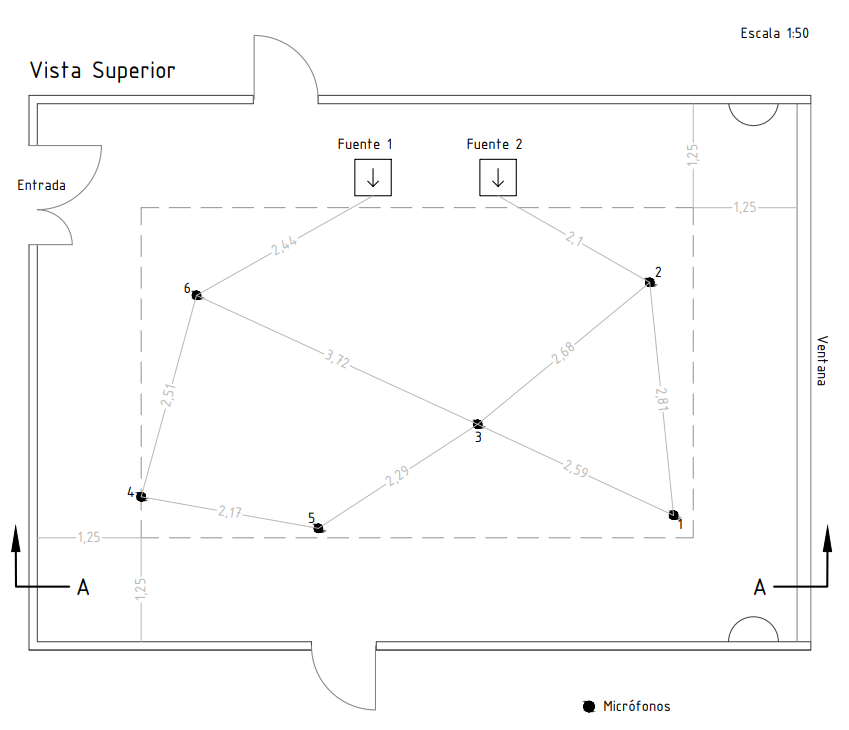

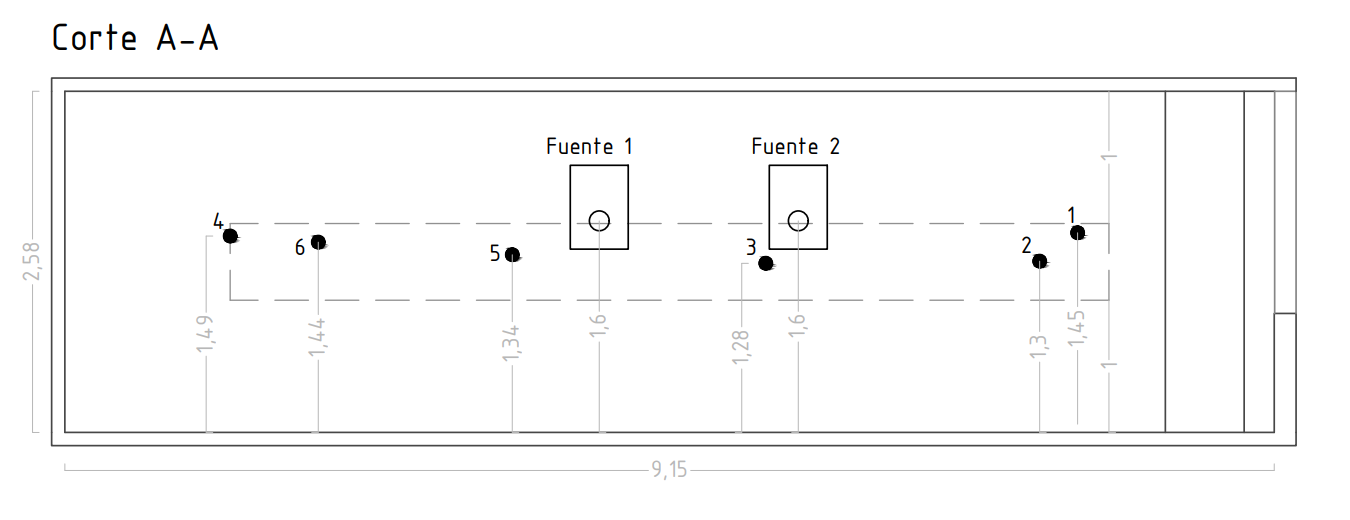

### Aclaraciones pertinentes

Se presentó un error en la generación del ruido rosa, y en su lugar, se utilizó ruido blanco sin que se notara inicialmente. En consecuencia, se optó por emular el ruido rosa empleando filtros que permitieran lograr un decaimiento en decibelios (dB) similar al que se buscaba obtener. Todas las grabaciones se efectuaron a una frecuencia de muestreo de 48000 Hz.

# Filtros utilizados

La normativa ISO 3382-2 indica analizar las frecuencias de 125 Hz a 4000 Hz en bandas de octavas y de 100 Hz a 5000 Hz en bandas de tercios de octavas. El cociente de octavas utilizado es en base 2 debido a la simpleza de calculos.

|f exacta en base dos ($2^{x/3}$) (1000) Hz|Frecuencia central nominal|
|------------|----------| 
|99.213 / 125.00 / 157.49|100 / 125 / 160|
|198.43 / 250.00 / 314.98|200 / 250 / 315|
|396.85 / 500.00 / 629.96|400 / 500 / 630|
|793.70 / 1000.0 / 1259.9|800 / 1000 / 1250|
|1587.4 / 2000.0 / 2519.8|1600 / 2000 / 2500| 
|3174.8 / 4000.0 / 5039.7|3150 / 4000 / 5000|

Se realizó un banco de filtros para bandas de octavas y bandas de tercios de octavas centradas en dichas frecuencias para realizar el análisis espectral reglamentado por la norma ISO 3382-2 y se diseñó otro filtro para el sinesweep inverso. Se comprobó la validez de los filtros de bandas de octavas y tercios de octavas según la norma ISO 61260. Los filtros de octava se realizaron con orden 3 y los de tercios de octava se desarrollaron con orden 4. Para todos los filtros se utilizó el formato de secciones de segundo orden, ya que de esta manera se mantiene la estabilidad de los mismos al aumentar sus ordenes.

In [3]:
nominal_oct_central_freqs = [125.0, 250.0, 500.0, 1000.0, 2000.0, 4000.0]
exact_oct_central_freqs = [125.0, 250.0, 500.0, 1000.0, 2000.0, 4000.0]
nominal_thirds_central_freqs = [100, 125.0, 160.0, 200.0, 250.0, 315.0, 400.0, 500.0, 630.0, 800.0, 1000.0, 1250.0, 1600.0, 2000.0, 2500.0, 3150.0, 4000.0, 5000.0]
exact_thirds_central_freqs = [99.123, 125.0, 157.49, 198.43, 250.0, 314.98, 396.85, 500.0, 628.96, 793.7, 1000.0, 1259.9, 1587.4, 2000.0, 2519.8, 3174.8, 4000.0, 5039.7]

A continuación se muestra la respuesta en frecuencia correspondiente a cada filtro y la atenuación relativa respecto de los límites impuestos por la norma ISO 61260.

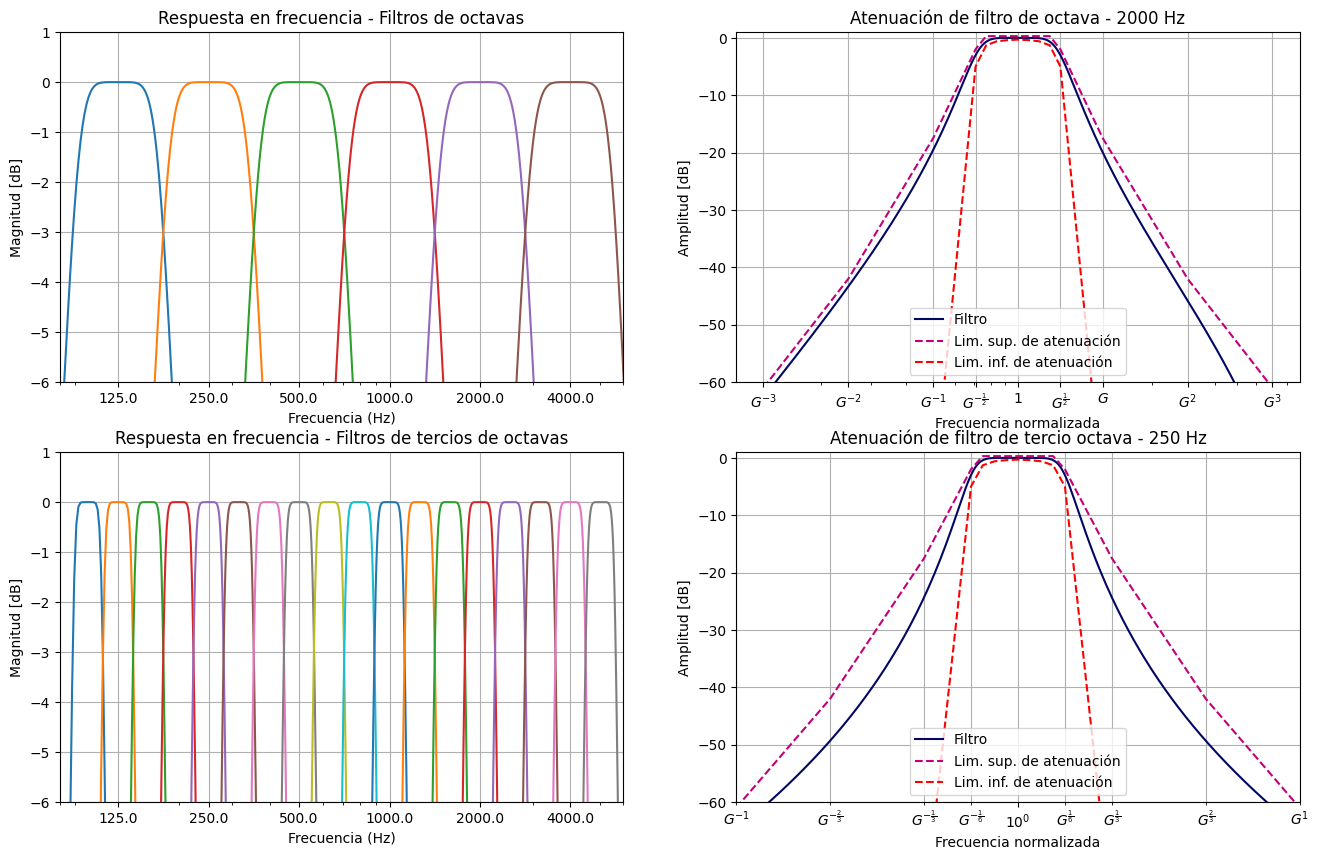

In [4]:
octave_filters_bank = fb.create_octaves_filter_bank(exact_oct_central_freqs, 48000, 3)
thirds_filters_bank = fb.create_thirds_filter_bank(exact_thirds_central_freqs, 48000, 4)

resp_octavas_title = "Respuesta en frecuencia - Filtros de octavas"
resp_tercios_title = "Respuesta en frecuencia - Filtros de tercios de octavas"
atenuacion_octava_title = "Atenuación de filtro de octava - 2000 Hz"
atenuacion_tercio_title = "Atenuación de filtro de tercio octava - 250 Hz"

resp_en_freq_octavas = lambda: plot.plot_ftf(octave_filters_bank, 48000, f_lim=[80, 6000], show=False, title=resp_octavas_title)
atenuacion_octavas = lambda: plot.check_filter_plot(2000, octave_filters_bank[4], 48000,  "octave", show=False, title=atenuacion_octava_title)
resp_en_freq_tercios = lambda: plot.plot_ftf(thirds_filters_bank, 48000, f_lim=[80, 6000], show=False,  title=resp_tercios_title)
atenuacion_tercios = lambda: plot.check_filter_plot(250, thirds_filters_bank[4], 48000,  "third", show=False, title=atenuacion_tercio_title)

plot.multiplot(resp_en_freq_octavas, atenuacion_octavas, resp_en_freq_tercios, atenuacion_tercios, figsize=(16, 10))

<h1>Análisis Espectral</h1>

En una medición de parámetros acústicos de un recinto, se realiza un análisis espectral para asegurarse de que la fuente pueda emitir a un nivel mayor que el piso de ruido. La norma indica que esta diferencia tiene que ser de al menos 35 dB en todas las bandas de análisis, por lo que estudiamos el comportamiento únicamente en las bandas de frecuencias mencionadas previamente. El objetivo de esta sección es determinar si se cumplieron o no los requisitos de la estandarización. A su vez, se estudió el comportamiento del recinto con un grupo de personas adentro.

Comenzamos la medición calibrando los micrófonos con un tono puro de 1KHz a 94 dBSPL para ajustar la ganancia de cada canal. Utilizamos la grabación del mismo para usar como escalado de amplitud y llevar todas las grabaciones a una escala en pascales. 
Es importante aclarar que cada vez que se va a llevar una grabación a escala en pascales o dB SPL, la referencia que debe utilizarse es la calibración del micrófono que hizo esa grabación. 

In [5]:
#busco los paths de las señales en el archivo de excel
cal_path = auf.get_paths("Paths.xlsx", "Calibracion")

#Entrega listas de los audios
calibraciones_fs, calibraciones = auf.get_signals(cal_path)

<h2>Piso de ruido</h2>


Se realizaron mediciones del nivel de ruido ambiental utilizando todos los micrófonos disponibles. El parámetro de interés en este contexto es el Nivel Sonoro Continuo Equivalente (LEQ), que representa el nivel de sonido medido durante un intervalo de tiempo, considerando un ruido que se supone constante. La expresión matemática del LEQ es:

\begin{equation}
LEQ= 10 \log{\left( \frac{1}{T} \sum{{t}_{i}10^{\frac{{Lp}_{i}}{10}}} \right)} 
\end{equation}

En donde $T$ es la duración total de la medición, ${t}_{i}$ corresponde a la duración temporal de una muestra $i$ y ${Lp}_{i}$ es el nivel dB SPL de la misma muestra ${i}$. A su vez, sabemos que el tiempo de duración se obtiene a partir de la cantidad de muestras $n$ y la frecuencia de sampleo $fs$, y que el intervalo de duración es el tiempo entre muestra y muestra (inverso de la frecuencia de sampleo):

\begin{align*}
T = \frac{n}{fs}       &&&&&      t{i} = \frac{1}{fs} 
\end{align*}


Reemplazando:

\begin{equation}
LEQ = 10 \log{\left( \frac{fs}{n} \frac{1}{fs} \sum{10^{\frac{{Lp}_{i}}{10}}} \right)} = 10 \log{ \left( \frac{1}{n} \sum{10^{\frac{{Lp}_{i}}{10}}} \right)}
\end{equation}

Por relación de la escala decibel:

\begin{equation}
 \left( \frac{{P}_{i}}{{P}_{ref}} \right)^2 = 10^{\frac{{Lp}_{i}}{10}}
\end{equation}

Por lo tanto, si reemplazamos en la ecuación original y quitamos la presión de referencia que se mantiene como constante:

\begin{equation}
LEQ = 10 \log{ \left( \frac{1}{{{P}_{ref}}^2} \frac{\sum{{{P}_{i}}^2}}{n} \right)}
\end{equation}

De esta manera, podemos obtener el nivel sonoro continuo equivalente de nuestras muestras calculando el promedio de la amplitud en pascales y aplicando la formula de nivel. De la misma forma, se demuestra que se puede interpretar como el promedio energético de una señal en un periodo de tiempo.

A partir de las grabaciones, se calculó el LEQ para cada banda de análisis en todas las mediciones y se obtuvo un promedio de estos valores para cada banda.

In [6]:
#cargo audios y obtengo el tiempo de duración. Solo necesito buscar el de un solo microfono ya que las grabaciones se hicieron en simultaneo
nf_sg_path = auf.get_paths("Paths.xlsx", "PR - SG")
nf_cg_path = auf.get_paths("Paths.xlsx", "PR - CG")

nf_sg_fs, nf_sg_recs = auf.get_signals(nf_sg_path)
nf_cg_fs, nf_cg_recs = auf.get_signals(nf_cg_path)

Graficamos lo primeros 10 segundos de una señal de piso de ruido para cada caso, se elegió el microfono 3 ya que es el que se encuntra mas proximo a una posición de escucha habitual según la función del recinto estudiado.  El objetivo del estudio es tener una primera aproximación al nivel de energía presente en el recinto.

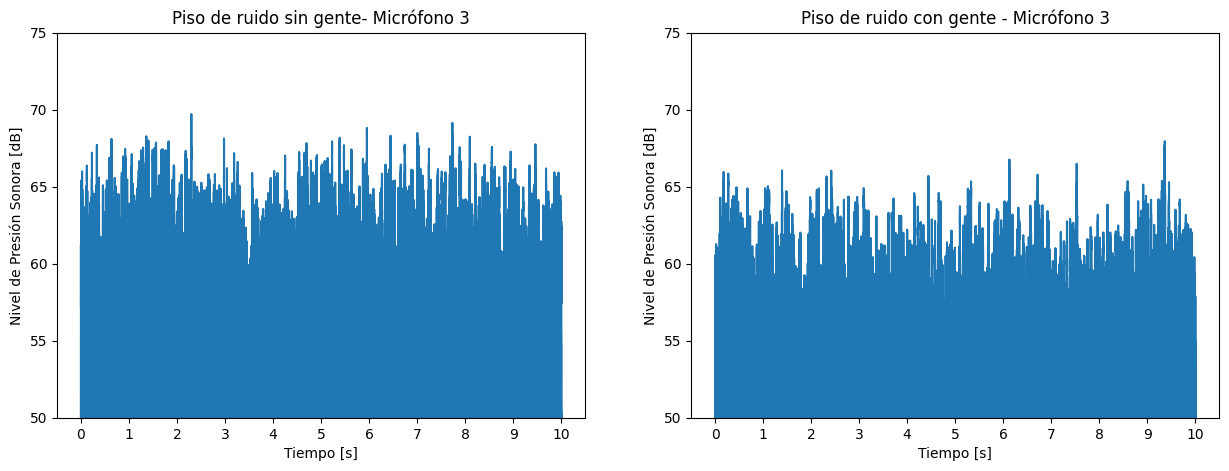

In [7]:
nf_3_sg_rec, nf_3_sg_fs = nf_sg_recs[2], nf_sg_fs[2]
nf_3_cg_rec, nf_3_cg_fs = nf_cg_recs[2], nf_cg_fs[2]

nf_3_sg_dB = auf.scale_amplitude(nf_3_sg_rec, calibraciones[2])[1]
nf_3_cg_dB = auf.scale_amplitude(nf_3_cg_rec, calibraciones[2])[1]

pr_sg_recortado = nf_3_sg_dB[0:10*nf_3_sg_fs]
pr_cg_recortado = nf_3_cg_dB[0:10*nf_3_cg_fs]

nf_3_sg_dB_time_array = auf.get_audio_time_array(pr_sg_recortado, nf_3_sg_fs)[1]
nf_3_cg_dB_time_array = auf.get_audio_time_array(pr_cg_recortado, nf_3_cg_fs)[1]

titles=["Piso de ruido sin gente- Micrófono 3", "Piso de ruido con gente - Micrófono 3"]
y_ticks = auf.np.arange(50, 80, 5)


pr_sg_plot_data = lambda: plot.plot_signal([nf_3_sg_dB_time_array, pr_sg_recortado], title=titles[0], xticks=10, yticks=y_ticks, show=False, y_label="Nivel de Presión Sonora [dB]")
pr_cg_plot_data = lambda: plot.plot_signal([nf_3_cg_dB_time_array, pr_cg_recortado], title=titles[1], xticks=10, yticks=y_ticks, show=False, y_label="Nivel de Presión Sonora [dB]")

plot.multiplot(pr_sg_plot_data, pr_cg_plot_data, figsize=(15, 5))

A partir de esta curva de nivel, estimamos que el nivel de presión sonora de piso de ruido en el caso del recinto vacío fluctúa entre un 65 y 70 dB  y en el otro caso se aproxima a los dB SPL un nivel mas cercano a los 65 dB SPL. 

Comenzamos el analisis de las bandas de octavas. Luego de filtrar las señales con el banco de filtros respectivo a cada ancho de banda, calculamos un promedio del LEQ para cada banda.

In [8]:
#calculo el leq para cada banda para todos los audios y los guardo en una lista para q ancho de banda

all_thirds_leq_sg = list(map(lambda x: auf.np.array(auf.leq_by_bands(x[0], thirds_filters_bank, x[1])), zip(nf_sg_recs, calibraciones)))
all_octaves_leq_sg = list(map(lambda x: auf.np.array(auf.leq_by_bands(x[0], octave_filters_bank, x[1])), zip(nf_sg_recs, calibraciones)))
all_thirds_leq_cg = list(map(lambda x: auf.np.array(auf.leq_by_bands(x[0], thirds_filters_bank, x[1])), zip(nf_cg_recs, calibraciones)))
all_octaves_leq_cg = list(map(lambda x: auf.np.array(auf.leq_by_bands(x[0], octave_filters_bank, x[1])), zip(nf_cg_recs, calibraciones)))

#paso a las listas a un numpy array para poder hacer el promedio entre bandas

all_thirds_leq_sg = auf.np.array(all_thirds_leq_sg)
all_octaves_leq_sg = auf.np.array(all_octaves_leq_sg)
all_thirds_leq_cg = auf.np.array(all_thirds_leq_cg)
all_octaves_leq_cg = auf.np.array(all_octaves_leq_cg)

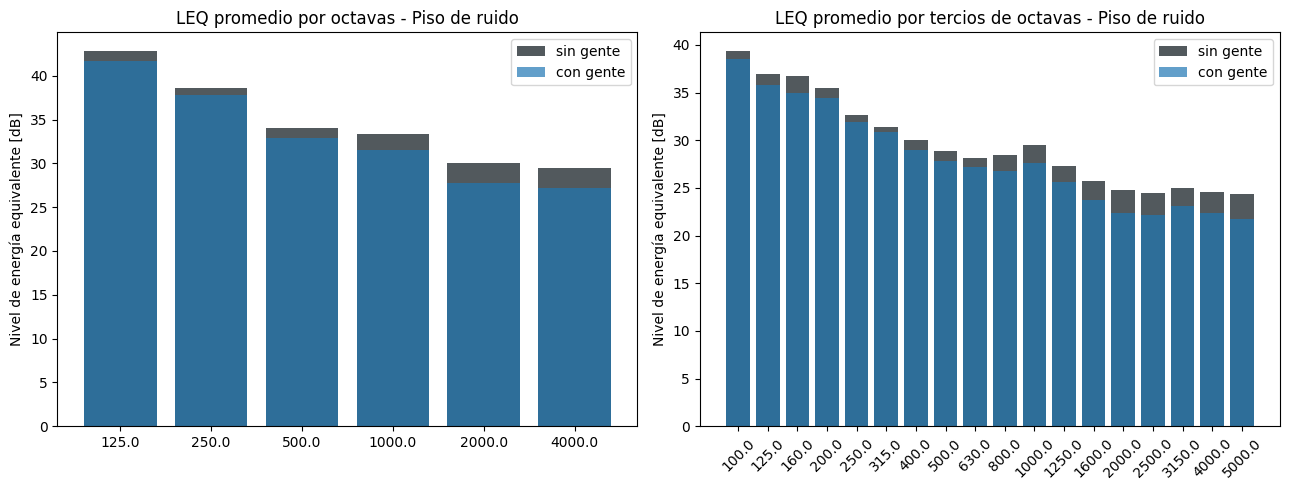

In [9]:
avg_octave_leq_sg_nf = auf.np.mean(all_octaves_leq_sg, axis=0)
avg_thirds_leq_sg_nf = auf.np.mean(all_thirds_leq_sg, axis=0)
avg_octave_leq_cg_nf = auf.np.mean(all_octaves_leq_cg, axis=0)
avg_thirds_leq_cg_nf = auf.np.mean(all_thirds_leq_cg, axis=0)

sg_octave_leq_plot = {"leq":avg_octave_leq_sg_nf, "label":"sin gente", "color":"#091218"} 
sg_thirds_leq_plot = {"leq":avg_thirds_leq_sg_nf, "label":"sin gente", "color":"#091218"} 
cg_octave_leq_plot = {"leq":avg_octave_leq_cg_nf, "label":"con gente"} 
cg_thirds_leq_plot = {"leq":avg_thirds_leq_cg_nf, "label":"con gente"} 

title = ["LEQ promedio por octavas - Piso de ruido", "LEQ promedio por tercios de octavas - Piso de ruido"]
octaves_leq_plot =  lambda: plot.plot_leqs(nominal_oct_central_freqs, sg_octave_leq_plot, cg_octave_leq_plot, title=title[0], show=False)
thirds_leq_plot =  lambda: plot.plot_leqs(nominal_thirds_central_freqs, sg_thirds_leq_plot, cg_thirds_leq_plot, title=title[1], rotate=True, show=False)

plot.multiplot(octaves_leq_plot, thirds_leq_plot, figsize=(13, 5)) 

Se puede ver que el recinto presentaba mayor energía de piso sin personas dentro de él.

A continuación, realizamos un análisis más profundo del recinto en las condiciones que establece la normativa, es decir sin personas dentro. Se estudió si los datos obtenidos de nuestros micrófonos se corresponde con lo registrado por los sonómetros. Se utilizan los micrófonos 1 y 6, ya que estaban colocados junto a un sonómetro cada uno. Las comparaciones a efectuar son las siguientes:

- Nivel sonoro continuo equivalente (LEQ) entre micrófono y sonómetro
- Nivel sonoro continuo equivalente (LEQ) entre micrófonos
- Nivel sonoro continuo equivalente (LEQ) entre sonómetros

In [10]:
#cargo valores de los sonómetros
thirds_sonometers_df, mr_sonometers_df = rf.excel_sheets_data_to_DataFrame("sonometros.xlsx", "tercios", "main_results")
mr_sonometers_df

,Medicion,Filter,Detector,Elapsed time,LZpeak,LZFmax,LZFmin,LZF(SPL),LZeq,LZE(SEL),Lden,Ltm3,LZFTeq,LEPd
0,PR - S1 - SG,Z,Fast,00:00:21,78.7,73.1,57.6,67.8,64.3,77.52,74.3,69.3,70.2,64.3
1,PR - S2 - SG,Z,Fast,00:00:23,77.1,73.3,54.6,66.5,63.4,77.02,73.4,68.7,70.2,63.4
2,PR - S1 - CG,Z,Fast,00:00:16,83.6,81.5,58.7,69.8,70.5,82.54,80.5,77.0,77.7,70.5
3,PR - S1 - SG,Z,Fast,00:00:17,83.5,81.6,57.0,73.0,70.5,82.80,80.5,76.7,77.8,70.5
4,RR - S2 - F1 - SG,Z,Fast,00:00:29,97.9,85.1,56.3,64.0,83.6,98.22,93.6,84.3,84.8,83.6
5,RR - S2 - F2 - CG,Z,Fast,00:00:28,96.9,86.4,62.5,75.9,82.7,97.17,92.7,84.1,84.9,82.7
6,RR - S2 - F2 - SG,Z,Fast,00:00:29,97.6,83.6,57.7,62.2,82.1,96.72,92.1,82.8,83.2,82.1
7,RR - S1 - F1 - SG,Z,Fast,00:00:28,97.9,84.9,56.0,65.3,83.9,98.37,93.9,84.3,84.8,83.9
8,RR - S1 - F2 - SG,Z,Fast,00:00:28,99.3,85.5,60.3,64.1,84.7,99.17,94.7,85.0,85.4,84.7
9,RR - S1 - F2 - CG,Z,Fast,00:00:28,99.7,87.6,63.8,75.2,85.0,99.47,95.0,85.8,86.6,85.0


In [11]:
thirds_sonometers_df

,Frequency [Hz],PR - S1 - SG,PR - S2 - SG,PR - S1 - CG,PR - S2 - CG,RR - S2 - F1 - SG,RR - S2 - F2 - CG,RR - S2 - F2 - SG,RR - S1 - F1 - SG,RR - S1 - F2 - SG,RR - S1 - F2 - CG
0,0.80,52.9,52.9,61.2,62.0,50.2,63.3,50.5,50.6,50.6,63.7
1,1.00,55.9,55.8,61.9,61.2,49.4,65.4,49.6,49.2,49.9,65.6
2,1.25,54.8,54.3,57.4,56.9,47.8,62.2,45.9,48.3,46.4,62.7
3,1.60,49.7,52.5,60.4,60.4,48.8,62.5,47.8,48.7,47.9,62.7
4,2.00,51.9,52.7,58.3,58.1,48.2,56.8,49.5,47.9,50.2,56.9
5,2.50,49.8,49.3,54.9,54.4,51.0,55.1,47.0,51.4,46.5,55.2
6,3.15,50.0,49.8,51.0,51.1,55.9,50.5,46.3,56.4,45.9,50.0
7,4.00,46.9,46.9,48.1,48.6,48.1,47.6,44.8,48.7,45.1,47.4
8,5.00,42.3,41.9,45.1,46.9,39.3,44.1,42.0,39.6,41.7,44.3
9,6.30,36.3,37.5,39.6,40.5,36.5,41.2,39.2,36.0,37.7,41.8


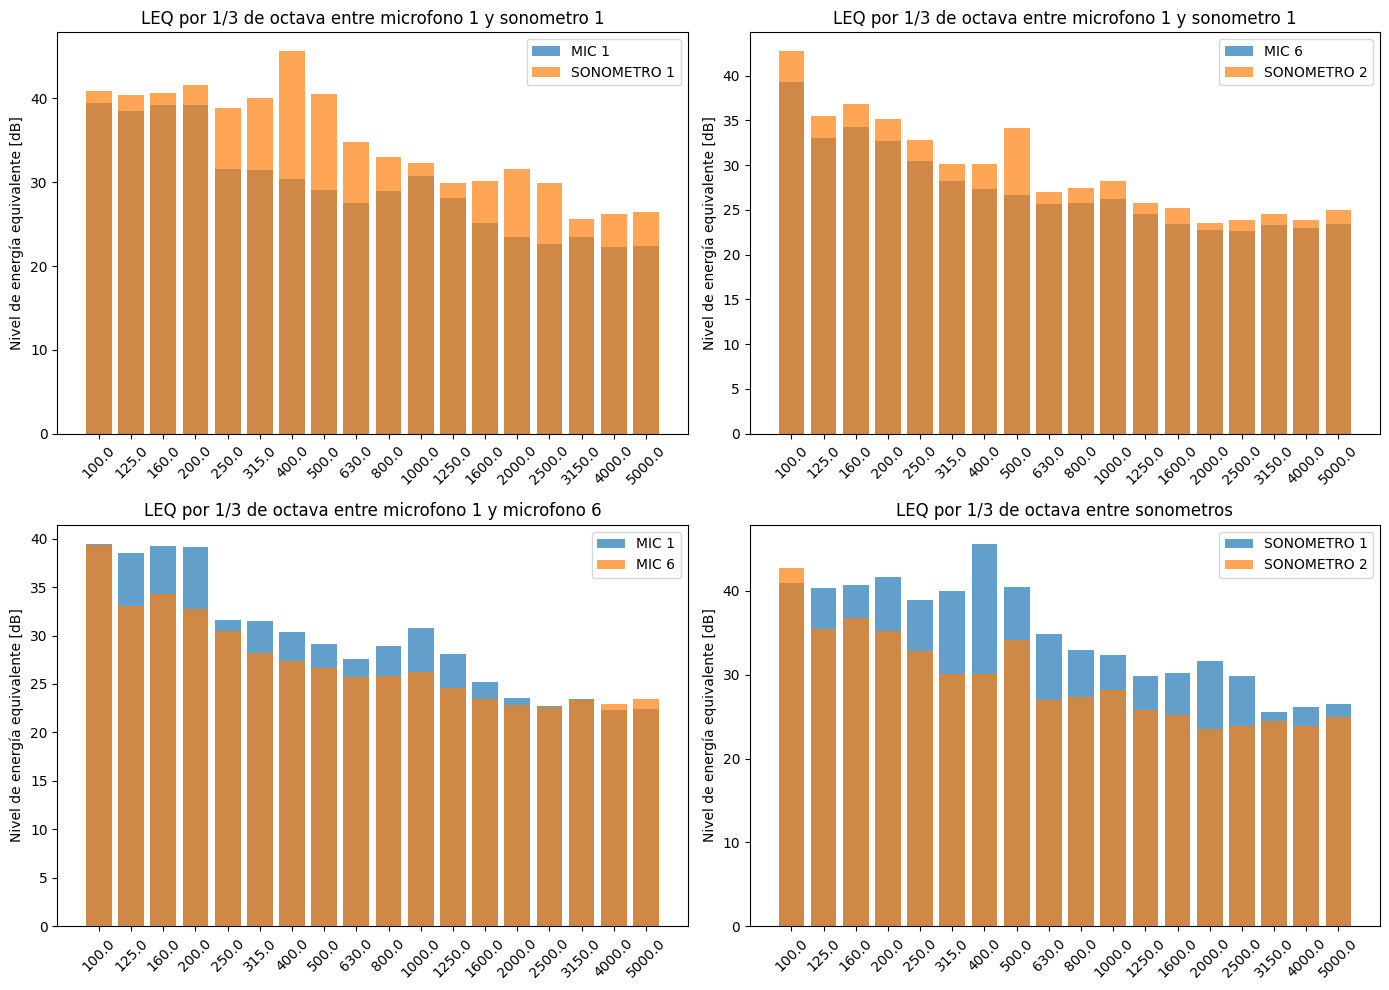

In [12]:
thirds_bands_leq_1 = auf.leq_by_bands(nf_sg_recs[0], thirds_filters_bank, ref=calibraciones[0])
thirds_bands_leq_6 = auf.leq_by_bands(nf_sg_recs[5], thirds_filters_bank, ref=calibraciones[5])

thirds_bands_leq_s1_nf = auf.get_sonometer_leq(thirds_sonometers_df, nominal_thirds_central_freqs, "PR - S1 - SG")
thirds_bands_leq_s2_nf = auf.get_sonometer_leq(thirds_sonometers_df, nominal_thirds_central_freqs, "PR - S2 - SG")

#datos para graficar
mic1_thirds_leq_plot_nf = {"leq":thirds_bands_leq_1, "label": "MIC 1"} 
s1_thirds_leq_plot_nf = {"leq":thirds_bands_leq_s1_nf, "label": "SONOMETRO 1"} 
mic6_thirds_leq_plot_nf = {"leq":thirds_bands_leq_6, "label": "MIC 6"} 
s2_thirds_leq_plot_nf = { "leq":thirds_bands_leq_s2_nf, "label": "SONOMETRO 2"} 

titles={
    "1": "LEQ por 1/3 de octava entre microfono 1 y sonometro 1", 
    "2":"LEQ por 1/3 de octava entre microfono 1 y sonometro 1", 
    "3": "LEQ por 1/3 de octava entre microfono 1 y microfono 6", 
    "4": "LEQ por 1/3 de octava entre sonometros"
}

plot_m1_s1_thirds = lambda: plot.plot_leqs(nominal_thirds_central_freqs, mic1_thirds_leq_plot_nf, s1_thirds_leq_plot_nf,  rotate=True, title=titles["1"], show=False)
plot_m6_s2_thirds = lambda: plot.plot_leqs(nominal_thirds_central_freqs, mic6_thirds_leq_plot_nf, s2_thirds_leq_plot_nf,   rotate=True, title=titles["2"], show=False)
plot_m1_m6_thirds = lambda: plot.plot_leqs(nominal_thirds_central_freqs, mic1_thirds_leq_plot_nf, mic6_thirds_leq_plot_nf,   rotate=True, title=titles["3"], show=False)
plot_s1_s2_thirds = lambda: plot.plot_leqs(nominal_thirds_central_freqs, s1_thirds_leq_plot_nf, s2_thirds_leq_plot_nf,  rotate=True, title=titles["4"], show=False)

plot.multiplot(plot_m1_s1_thirds, plot_m6_s2_thirds, plot_m1_m6_thirds, plot_s1_s2_thirds, figsize=(14, 10))

En este gráfico se aprecian las diferencias de mediciones entre microfonos y sonómetros, y las diferencias al estar en diferentes posiciones. 

A continuación se hace un análisis similar pero en bandas de octavas. Los datos entregados por el sonómetro corresponden a la energía por tercios de octava, por lo que es necesario realizar la suma de niveles sonoros equivalentes entre los tercios que corresponden a la misma banda. 

\begin{equation}
LEQ_{\text{octava}} = 10 \cdot \log_{10}\left(10^{\frac{LEQ_\text{1}}{10}} + 10^{\frac{LEQ_\text{2}}{10}} + 10^{\frac{LEQ_\text{3}}{10}}\right)
\end{equation}

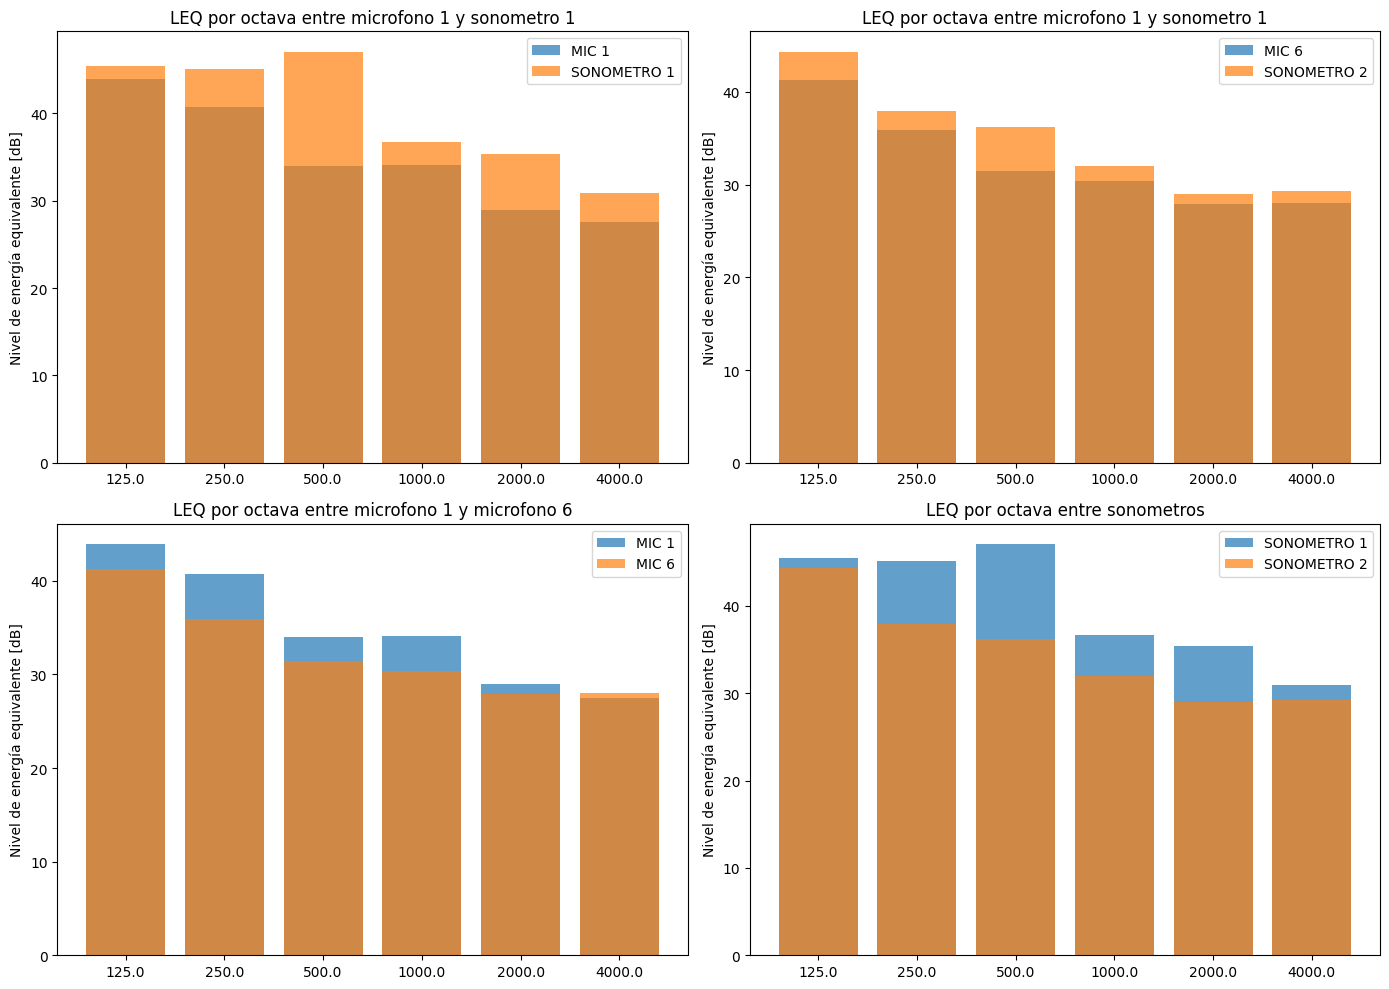

In [13]:
octave_bands_leq_1  = auf.leq_by_bands(nf_sg_recs[0], octave_filters_bank, ref=calibraciones[0])
octave_bands_leq_6 = auf.leq_by_bands(nf_sg_recs[5], octave_filters_bank, ref=calibraciones[5])

octave_bands_leq_s1 = []
octave_bands_leq_s2 = []

for i in range(0, 18, 3):
    octave_s1 = auf.sum_bands([thirds_bands_leq_s1_nf[i], thirds_bands_leq_s1_nf[i + 1], thirds_bands_leq_s1_nf[i + 2]])
    octave_s2 = auf.sum_bands([thirds_bands_leq_s2_nf[i], thirds_bands_leq_s2_nf[i + 1], thirds_bands_leq_s2_nf[i + 2]])

    octave_bands_leq_s1.append(octave_s1)
    octave_bands_leq_s2.append(octave_s2)

#datos para graficar
mic1_octaves_leq_plot = {"leq":octave_bands_leq_1, "label": "MIC 1"} 
mic6_octaves_leq_plot = {"leq":octave_bands_leq_6, "label": "MIC 6"} 
s1_octaves_leq_plot = {"leq":octave_bands_leq_s1, "label": "SONOMETRO 1"} 
s2_octaves_leq_plot = { "leq":octave_bands_leq_s2, "label": "SONOMETRO 2"} 

titles={
    "1": "LEQ por octava entre microfono 1 y sonometro 1", 
    "2":"LEQ por octava entre microfono 1 y sonometro 1", 
    "3": "LEQ por octava entre microfono 1 y microfono 6", 
    "4": "LEQ por octava entre sonometros"
}

plot_m1_s1_oct = lambda: plot.plot_leqs(nominal_oct_central_freqs, mic1_octaves_leq_plot, s1_octaves_leq_plot, title=titles["1"], show=False)
plot_m6_s2_oct = lambda: plot.plot_leqs(nominal_oct_central_freqs, mic6_octaves_leq_plot, s2_octaves_leq_plot, title=titles["2"], show=False)
plot_m1_m6_oct = lambda: plot.plot_leqs(nominal_oct_central_freqs, mic1_octaves_leq_plot, mic6_octaves_leq_plot, title=titles["3"], show=False)
plot_s1_s2_oct = lambda: plot.plot_leqs(nominal_oct_central_freqs, s1_octaves_leq_plot, s2_octaves_leq_plot, title=titles["4"], show=False)

plot.multiplot(plot_m1_s1_oct, plot_m6_s2_oct, plot_m1_m6_oct, plot_s1_s2_oct, figsize=(14, 10))

Una rápida comparación entre los niveles de sonoros equivalentes en bandas de octavas indica que los comportamientos mencionados anteriormente se mantienen. Por último se vuelven a comparar micrófonos y sonómetros, pero con respecto a los niveles de energía totales (dentro de las bandas de análisis) y agregando el promedio registrado por los micrófonos.

Basándonos en los gráficos presentados, podemos extraer las siguientes conclusiones:

- Diferencias entre Sonómetros y Micrófonos: Se aprecia que ambos sonómetros registraron niveles de ruido más altos en comparación con sus respectivos micrófonos (en mayor o menor medida). Al analizar las condiciones de las mediciones, se observa que los sonómetros tuvieron un tiempo de registro mayor (21 segundos para el primero y 23 segundos para el segundo) en comparación con los micrófonos (18 segundos). Sin embargo esta hipótesis es difícil de sustentar, ya que el LEQ es una medida de promedio energético en un intervalo de tiempo, lo cuál sugiere que dicha diferencia temporal es insignificante. Otra hipótesis se relaciona con la calibración de los micrófonos, donde al escuchar los audios se percibe ruido de fondo, lo que podría indicar que los 94 dB SPL registrados corresponden tanto al tono puro de referencia como al ruido de fondo. De ser así, la referencia real podría situarse ligeramente por debajo de 94 dB SPL.
<p></p>
- Diferencia entre Ventanas y Puertas: Se observa que el nivel de ruido captado por el micrófono ubicado cerca de las ventanas es ligeramente mayor en comparación con el registrado por el micrófono ubicado cerca de las puertas. Este comportamiento es coherente con la diferencia observada entre los dos sonómetros.
<p></p>

- Sonómetro 1: Se puede observar que las diferencias del sonómetro 1 respecto de micrófono 1 y el sonómetro 2 son significativamente superiores a las diferencias entre micrófonos 1 y 6 y las correspondientes a sonometro 2 y micrófono 6. Esto podría indicar un error en la calibración del sonómetro, su posicionamiento o su uso.

Estas conclusiones resaltan la necesidad de investigar más a fondo las discrepancias entre las mediciones de sonómetros y micrófonos, así como comprender mejor la calibración de los micrófonos para obtener mediciones precisas. Además, se identifica una variación en el nivel de ruido en función de la ubicación de los micrófonos, lo que podría tener implicaciones importantes en la caracterización acústica del espacio.

<h2>Ruido emitido por la fuente</h2>

La norma establece que para el estudio de análisis espectral se debe utilizar ruido de espectro plano, es decir ruido rosa. Se reconoce que durante la medición se empleó ruido blanco en lugar de ruido rosa. La diferencia fundamental entre ellos radica en que el último reduce la energía en 3 decibelios (dB) por cada duplicación de frecuencia. Se realizará un ajuste para obtener mediciones  conformes con los requisitos de la norma en cuanto al uso de ruido rosa para evaluar la relación señal-ruido.

El método de corrección planteado implica reducir el LEQ de la señal de ruido blanco tomada por los micrófonos en 3 dB por número de banda en el caso de las octavas, y en 1 dB por número de banda en el caso de las bandas de tercio de octava. El propósito de esta corrección es eliminar parte de la energía adicional debida a la duplicación de frecuencia en el ruido blanco en comparación con el ruido rosa. Cabe destacar que esta corrección es una aproximación y nos referiremos a los resultados de la corrección como "ruido corregido". Surgieron otros caminos para realizar el proceso y se optó este según eficiencia de cálculos. A efectos prácticos del trabajo queda fuera del mismo estudiar cuál es el método mas acertado, sin embargo consideramos que sería correcto dedicar un análisis mas detallado del procedimiento.

In [16]:
ruido_f1_sg_paths = auf.get_paths("Paths.xlsx", "RR - F1 - SG")
ruido_f2_sg_paths = auf.get_paths("Paths.xlsx", "RR - F2 - SG")
ruido_f2_cg_paths = auf.get_paths("Paths.xlsx", "RR - F2 - CG")


ruido_f1_sg_fs, ruido_f1_sg_recs = auf.get_signals(ruido_f1_sg_paths)
ruido_f2_sg_fs, ruido_f2_sg_recs = auf.get_signals(ruido_f2_sg_paths)
ruido_f2_cg_fs, ruido_f2_cg_recs = auf.get_signals(ruido_f2_cg_paths)

#recorto los primeros 5 segundos para eliminar las muestras previas a la emisión de ruido:
ruido_f1_sg_recs = list(map(lambda x: x[5*ruido_f1_sg_fs[0]:], ruido_f1_sg_recs))
ruido_f2_sg_recs = list(map(lambda x: x[5*ruido_f2_sg_fs[0]:], ruido_f2_sg_recs))
ruido_f2_cg_recs = list(map(lambda x: x[5*ruido_f2_cg_fs[0]:], ruido_f2_cg_recs))

Primero realizamos el analísis de excitación del recinto con ruido blanco, tomando nuevamente 5 segundos de una de las grabaciones para observar el nivel de presión sonora generado en uno de los puntos de la medición. Nuevamente se eligió el microfono 3 debido a su posición, y la posición 2 de la fuente ya que corresponde a la ubicación habitual de un profesor explicando en el pizarrón del aula.

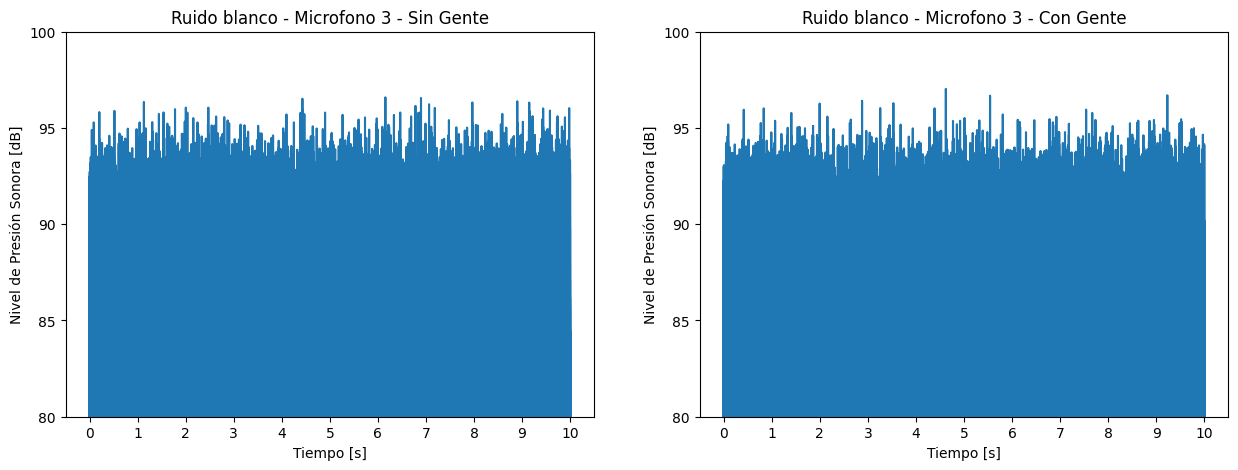

In [17]:
rb_m3_f2_sg_fs = ruido_f2_sg_fs[2]
rb_m3_f2_sg = ruido_f2_sg_recs[2]
rb_m3_f2_cg = ruido_f2_cg_recs[2]

#obtengo las curvas en dB SPL y recorto 10 segundos
rb_m3_f2_sg_dB = auf.scale_amplitude(rb_m3_f2_sg, calibraciones[2])[1][0:10*rb_m3_f2_sg_fs]
rb_m3_f2_cg_dB = auf.scale_amplitude(rb_m3_f2_cg, calibraciones[2])[1][0:10*rb_m3_f2_sg_fs]

rb_m3_f2_sg_time_array = auf.get_audio_time_array(rb_m3_f2_sg_dB, rb_m3_f2_sg_fs)[1]
rb_m3_f2_cg_time_array = auf.get_audio_time_array(rb_m3_f2_cg_dB, rb_m3_f2_sg_fs)[1]

titles=["Ruido blanco - Microfono 3 - Sin Gente", "Ruido blanco - Microfono 3 - Con Gente"]

y_ticks = auf.np.arange(80, 105, 5)

rb_sg_plot_data = lambda: plot.plot_signal([rb_m3_f2_sg_time_array, rb_m3_f2_sg_dB], title=titles[0], xticks=10, yticks=y_ticks, show=False, y_label="Nivel de Presión Sonora [dB]")
rb_cg_plot_data = lambda: plot.plot_signal([rb_m3_f2_cg_time_array, rb_m3_f2_cg_dB], title=titles[1], xticks=10, yticks=y_ticks, show=False, y_label="Nivel de Presión Sonora [dB]")

plot.multiplot(rb_sg_plot_data, rb_cg_plot_data, figsize=(15, 5))

A partir del gráfico estimamos que el nivel de presión sonora alcanzado en ese punto debido a la fuente emitiendo ruido blanco es de aproximadamente 95 dB SPL. Recordando el estudio previo de piso de ruido, esto puede ser un indicio de que no se pudo superar la diferencia de 35 dB SPL que establece la norma.

Se realiza un filtrando por bandas, para calcular el promedio de todas las grabaciones sobre dichas bandas. Un estudio teórico previo a los resultados nos indica que se debe observar una menor diferencia de niveles entre bandas graves y bandas mas altas, debido al ruido blanco.

In [18]:
all_thirds_leq_rr = []
all_octaves_leq_rr = []

#calculo el leq para cada banda para todos los audios y los guardo en una lista para q ancho de banda

for i, audio in enumerate(ruido_f1_sg_recs):
    ocatves_leq = auf.leq_by_bands(audio, octave_filters_bank, calibraciones[i])
    thirds_leq = auf.leq_by_bands(audio, thirds_filters_bank, calibraciones[i])

    all_thirds_leq_rr.append(auf.np.array(thirds_leq))
    all_octaves_leq_rr.append(auf.np.array(ocatves_leq))

for i, audio in enumerate(ruido_f2_sg_recs):
    ocatves_leq = auf.leq_by_bands(audio, octave_filters_bank, calibraciones[i])
    thirds_leq = auf.leq_by_bands(audio, thirds_filters_bank, calibraciones[i])

    all_thirds_leq_rr.append(auf.np.array(thirds_leq))
    all_octaves_leq_rr.append(auf.np.array(ocatves_leq))

#paso a las listas a un numpy array para poder hacer el promedio entre bandas

all_thirds_leq_rr = auf.np.array(all_thirds_leq_rr)
all_octaves_leq_rr = auf.np.array(all_octaves_leq_rr)

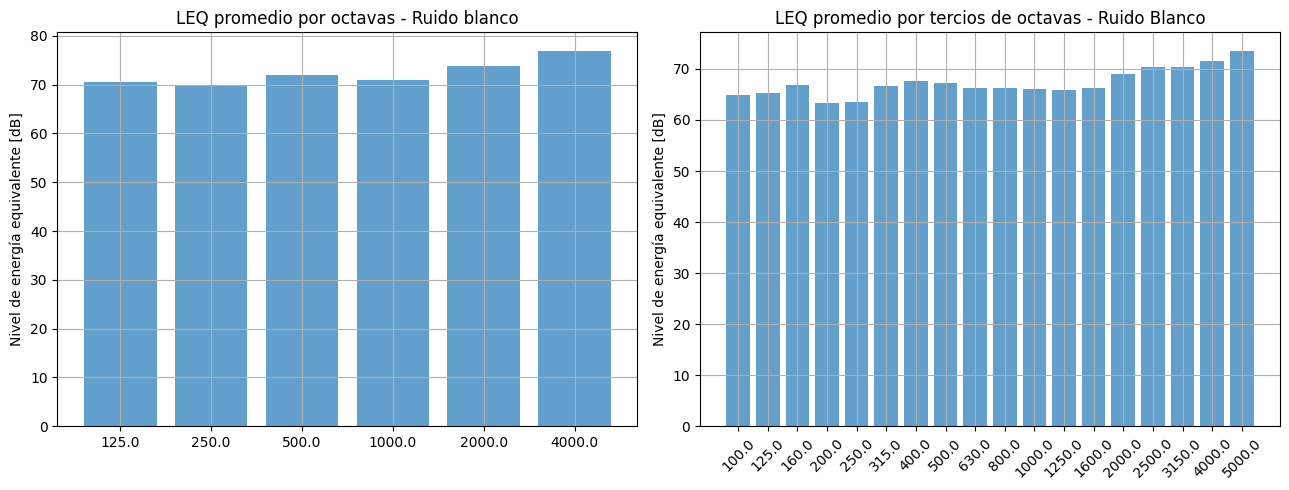

In [20]:
avg_thirds_leq_rr = auf.np.mean(all_thirds_leq_rr, axis=0)
avg_octave_leq_rr = auf.np.mean(all_octaves_leq_rr, axis=0)

all_octave_leq_plot_rr = {"leq":avg_octave_leq_rr} 
all_thirds_leq_plot_rr = {"leq":avg_thirds_leq_rr} 

title = ["LEQ promedio por octavas - Ruido blanco", "LEQ promedio por tercios de octavas - Ruido Blanco"]
octaves_leq_plot_rr =  lambda: plot.plot_leqs(nominal_oct_central_freqs, all_octave_leq_plot_rr, title=title[0], show=False)
thirds_leq_plot_rr =  lambda: plot.plot_leqs(nominal_thirds_central_freqs, all_thirds_leq_plot_rr, title=title[1], rotate=True, show=False)

plot.multiplot(octaves_leq_plot_rr, thirds_leq_plot_rr, figsize=(13, 5)) 

En los graficos superiores, vemos que se cumple el análisis teórico mencionado. A pesar de que el nivel del piso de ruido es mayor en frecuencias bajas que en frecuencias altas (como pudimos notar en el analísis de piso de ruido), en esta situación la diferencia se invierte. Esto se debe al mayor aporte energético del ruido blanco a bandas de frecuencias cada vez mas altas.

A partir de los caluclos de nivel sonoro continuo equivalente por bandas, procedemos a aplicar la corrección. Esta corrección 

In [21]:
cantidad_octavas = len(nominal_oct_central_freqs)
cantidad_tercios = len(nominal_thirds_central_freqs)

reduccion_octavas = auf.np.arange(cantidad_octavas) * 3
reduccion_tercios = auf.np.arange(cantidad_tercios)

avg_thirds_leq_rr_corr = avg_thirds_leq_rr - reduccion_tercios
avg_octave_leq_rr_corr = avg_octave_leq_rr - reduccion_octavas

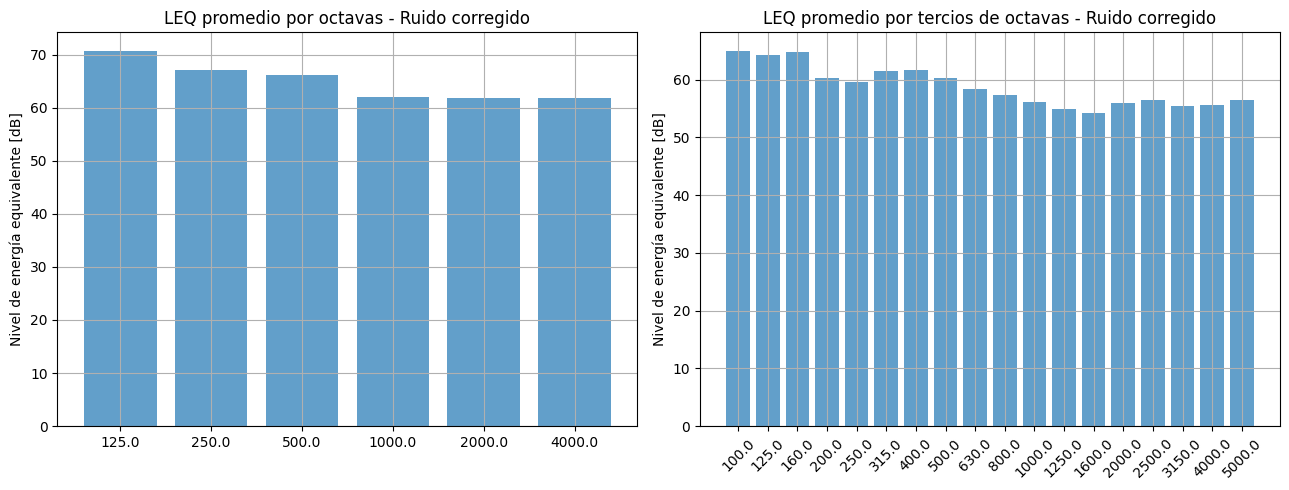

In [22]:
octave_rr_corr_plot = {"leq":avg_octave_leq_rr_corr} 
thirds_rr_corr_plot = {"leq":avg_thirds_leq_rr_corr} 

title = ["LEQ promedio por octavas - Ruido corregido", "LEQ promedio por tercios de octavas - Ruido corregido"]
octaves_leq_plot_corr =  lambda: plot.plot_leqs(nominal_oct_central_freqs, octave_rr_corr_plot, title=title[0], show=False)
thirds_leq_plot_corr =  lambda: plot.plot_leqs(nominal_thirds_central_freqs, thirds_rr_corr_plot, title=title[1], rotate=True, show=False)

plot.multiplot(octaves_leq_plot_corr, thirds_leq_plot_corr, figsize=(13, 5)) 

Previo a la comparación, es pertinente mencionar que nuevamente hay mayor nivel en bandas de frecuencia mas bajas.

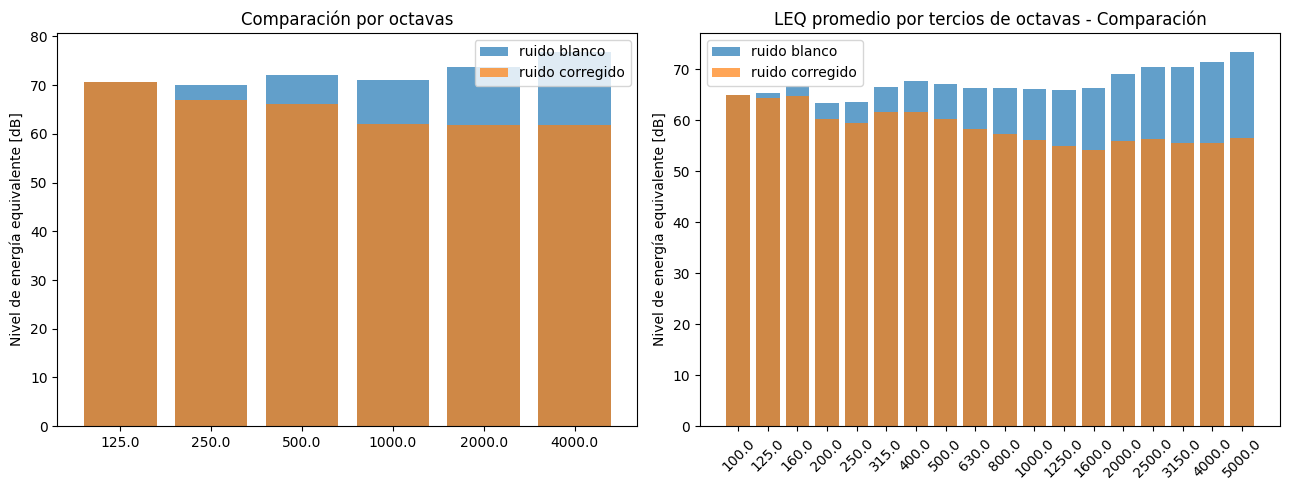

In [23]:
all_octave_rb_plot = {"leq":avg_octave_leq_rr, "label":"ruido blanco"} 
all_thirds_rb_plot = {"leq":avg_thirds_leq_rr, "label":"ruido blanco"} 
all_octave_corr_plot = {"leq":avg_octave_leq_rr_corr, "label":"ruido corregido"} 
all_thirds_corr_plot = {"leq":avg_thirds_leq_rr_corr, "label":"ruido corregido"} 

title = ["Comparación por octavas", "LEQ promedio por tercios de octavas - Comparación"]

octaves_leq_plot_rr =  lambda: plot.plot_leqs(nominal_oct_central_freqs, all_octave_rb_plot, all_octave_corr_plot, title=title[0], show=False)
thirds_leq_plot_rr =  lambda: plot.plot_leqs(nominal_thirds_central_freqs, all_thirds_rb_plot, all_thirds_corr_plot, title=title[1], rotate=True, show=False)

plot.multiplot(octaves_leq_plot_rr, thirds_leq_plot_rr, figsize=(13, 5)) 

Otra forma de realizar la corrección sería aplicar un filtro de 3dB por octava a la grabación. Por motivos de tiempos, se eligió hacer este recorte de energía que es más rápido. A forma de comparación y análisis, sería apropiado realizar un análisis mas profundo de ambas formas de corrección de la señal.

Finalmente vamos a comparar las señales de ruido corregido y ruido de fondo. 

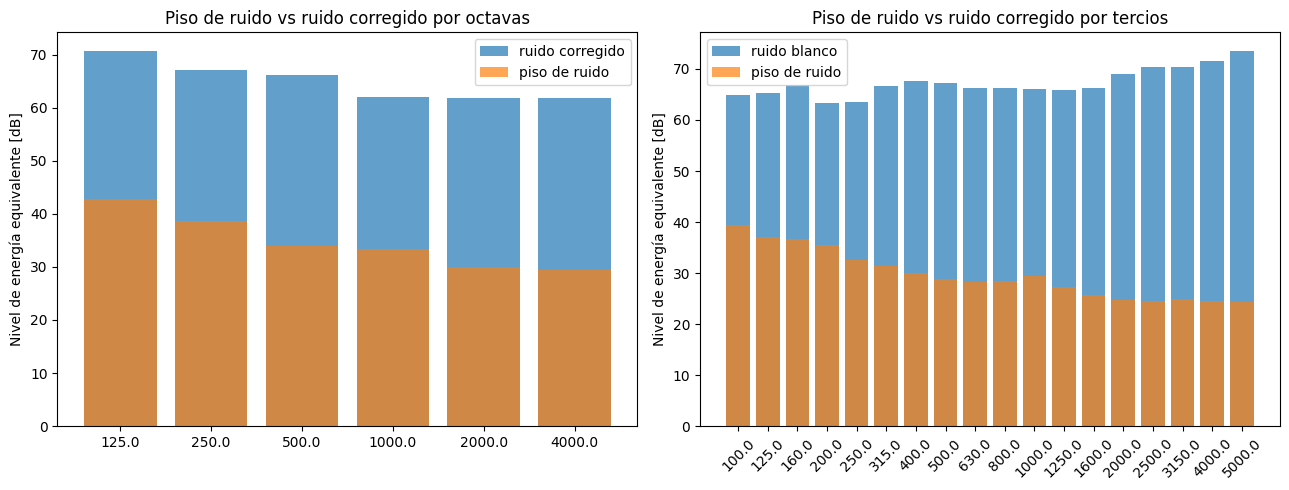

In [24]:
#rd: rango dinámico

all_octave_leq_nf_plot = {"leq":avg_octave_leq_sg_nf, "label":"piso de ruido"} 
all_thirds_leq_nf_plot = {"leq":avg_thirds_leq_sg_nf, "label":"piso de ruido"} 

title = ["Piso de ruido vs ruido corregido por octavas", "Piso de ruido vs ruido corregido por tercios"]

rd_octaves_plot =  lambda: plot.plot_leqs(nominal_oct_central_freqs, all_octave_corr_plot, all_octave_leq_nf_plot, title=title[0], show=False)
rd_thirds_plot=  lambda: plot.plot_leqs(nominal_thirds_central_freqs, all_thirds_rb_plot, all_thirds_leq_nf_plot, title=title[1], rotate=True, show=False)

plot.multiplot(rd_octaves_plot, rd_thirds_plot, figsize=(13, 5)) 

Calculamos las diferencias de nivel por bandas, en ruido blanco y ruido corregido:

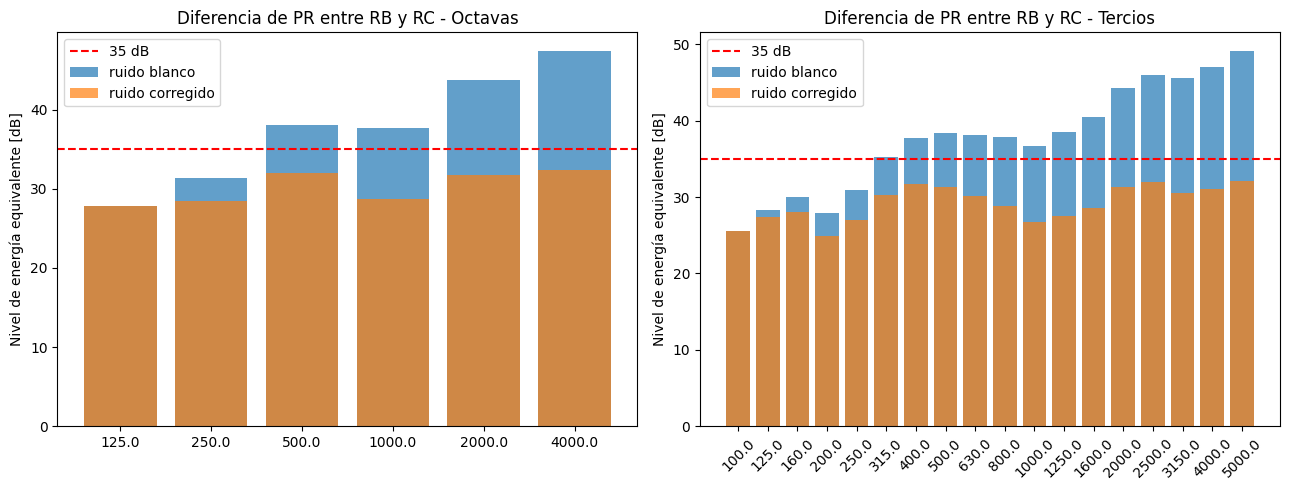

In [25]:
dif_octaves_rb = avg_octave_leq_rr - avg_octave_leq_sg_nf 
dif_thirds_rb = avg_thirds_leq_rr - avg_thirds_leq_sg_nf
dif_octaves_corr = avg_octave_leq_rr_corr - avg_octave_leq_sg_nf
dif_thirds_corr = avg_thirds_leq_rr_corr - avg_thirds_leq_sg_nf

dif_octaves_rb_plot_data = {"leq":dif_octaves_rb, "label":"ruido blanco"} 
dif_thirds_rb_plot_data = {"leq":dif_thirds_rb, "label":"ruido blanco"} 
dif_octaves_corr_plot_data = {"leq":dif_octaves_corr, "label":"ruido corregido"} 
dif_thirds_corr_plot_data = {"leq":dif_thirds_corr, "label":"ruido corregido"} 

title = ["Diferencia de PR entre RB y RC - Octavas", "Diferencia de PR entre RB y RC - Tercios"]
dif_octaves_plot =  lambda: plot.plot_leqs(nominal_oct_central_freqs, dif_octaves_rb_plot_data, dif_octaves_corr_plot_data,title=title[0], show=False, set_hline=35)
dif_thirds_plot =  lambda: plot.plot_leqs(nominal_thirds_central_freqs,dif_thirds_rb_plot_data, dif_thirds_corr_plot_data, title=title[1], rotate=True, show=False, set_hline=35)

plot.multiplot(dif_octaves_plot, dif_thirds_plot, figsize=(13, 5)) 

Al calcular la diferencia de nivel del ruido blanco y ruido corregido con el piso de ruido respectivamente, observamos que en algunas bajas frecuencias no se alcanza la diferencia de nivel reglamentada, y en las frecuencias que sí se pudo superar es únicamente el nivel de ruido blanco.

Se repitió el análisis de ruido blanco y ruido corregido para el caso del recinto con personas en su interior.

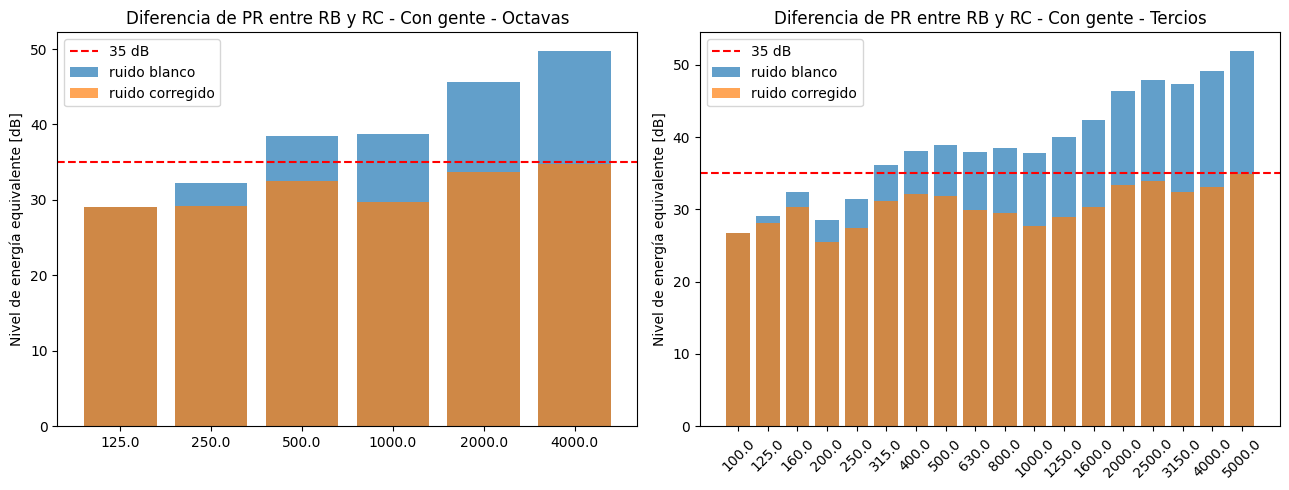

In [28]:
all_thirds_leq_cg = []
all_octaves_leq_cg = []

#calculo el leq para cada banda para todos los audios y los guardo en una lista para q ancho de banda

for i, audio in enumerate(ruido_f2_cg_recs):
    ocatves_leq = auf.leq_by_bands(audio, octave_filters_bank, calibraciones[i])
    thirds_leq = auf.leq_by_bands(audio, thirds_filters_bank, calibraciones[i])

    all_thirds_leq_cg.append(auf.np.array(thirds_leq))
    all_octaves_leq_cg.append(auf.np.array(ocatves_leq))

#paso a las listas a un numpy array para poder hacer el promedio entre bandas

all_thirds_leq_corr_cg = auf.np.array(all_thirds_leq_cg)
all_octaves_leq_corr_cg = auf.np.array(all_octaves_leq_cg)

avg_thirds_leq_cg = auf.np.mean(all_thirds_leq_cg, axis=0)
avg_octave_leq_cg = auf.np.mean(all_octaves_leq_cg, axis=0)

#aplicamos corrección

avg_thirds_leq_corr_cg = avg_thirds_leq_cg - reduccion_tercios
avg_octave_leq_corr_cg = avg_octave_leq_cg - reduccion_octavas


#calculamos diferencia para ruido blanco y para ruido corregido:
dif_thirds_rb_cg = avg_thirds_leq_cg - avg_thirds_leq_cg_nf 
dif_octaves_rb_cg = avg_octave_leq_cg - avg_octave_leq_cg_nf
dif_octaves_corr_cg = avg_octave_leq_corr_cg - avg_octave_leq_cg_nf  
dif_thirds_corr_cg = avg_thirds_leq_corr_cg - avg_thirds_leq_cg_nf 

dif_octaves_rb_cg_plot_data = {"leq":dif_octaves_rb_cg, "label":"ruido blanco"} 
dif_thirds_rb_cg_plot_data = {"leq":dif_thirds_rb_cg, "label":"ruido blanco"} 
dif_octaves_corr_cg_plot_data = {"leq":dif_octaves_corr_cg, "label":"ruido corregido"} 
dif_thirds_corr_cg_plot_data = {"leq":dif_thirds_corr_cg, "label":"ruido corregido"} 

title = ["Diferencia de PR entre RB y RC - Con gente - Octavas", "Diferencia de PR entre RB y RC - Con gente - Tercios"]

dif_octaves_plot =  lambda: plot.plot_leqs(nominal_oct_central_freqs, dif_octaves_rb_cg_plot_data, dif_octaves_corr_cg_plot_data,title=title[0], show=False, set_hline=35)
dif_thirds_plot =  lambda: plot.plot_leqs(nominal_thirds_central_freqs,dif_thirds_rb_cg_plot_data, dif_thirds_corr_cg_plot_data, title=title[1], rotate=True, show=False, set_hline=35)

plot.multiplot(dif_octaves_plot, dif_thirds_plot, figsize=(13, 5))

Nuevamente comparamos los datos obtenidos a partir de los sonómetros con los registrados por los micrófonos.

In [37]:
thirds_rr1_s1 = auf.get_sonometer_leq(thirds_sonometers_df, nominal_thirds_central_freqs, "RR - S1 - F1 - SG")
thirds_rr1_s2 = auf.get_sonometer_leq(thirds_sonometers_df, nominal_thirds_central_freqs, "RR - S2 - F1 - SG")
thirds_rr2_s1 = auf.get_sonometer_leq(thirds_sonometers_df, nominal_thirds_central_freqs, "RR - S1 - F2 - SG")
thirds_rr2_s2 = auf.get_sonometer_leq(thirds_sonometers_df, nominal_thirds_central_freqs, "RR - S2 - F2 - SG")

thirds_rr_s1 = auf.np.stack((auf.np.array(thirds_rr1_s1), auf.np.array(thirds_rr2_s1)))
thirds_rr_s2 = auf.np.stack((auf.np.array(thirds_rr1_s2), auf.np.array(thirds_rr2_s2)))

avg_thirds_rr_s1 = auf.np.mean(thirds_rr_s1, axis=0)
avg_thirds_rr_s2 = auf.np.mean(thirds_rr_s2, axis=0)

In [39]:
rr_m1_f1, rr_m6_f1, rr_m1_f2, rr_m6_f2 = ruido_f1_sg_recs[0], ruido_f1_sg_recs[5], ruido_f2_sg_recs[0], ruido_f2_sg_recs[5]

mic_1_rr1_thirds = auf.leq_by_bands(rr_m1_f1, thirds_filters_bank, calibraciones[0])
mic_6_rr1_thirds = auf.leq_by_bands(rr_m6_f1, thirds_filters_bank, calibraciones[5])
mic_1_rr2_thirds = auf.leq_by_bands(rr_m1_f2, thirds_filters_bank, calibraciones[0])
mic_6_rr2_thirds = auf.leq_by_bands(rr_m6_f2, thirds_filters_bank, calibraciones[5])

mic_1_rr_thirds = auf.np.stack((auf.np.array(mic_1_rr1_thirds), auf.np.array(mic_1_rr2_thirds)))
mic_6_rr_thirds = auf.np.stack((auf.np.array(mic_6_rr1_thirds), auf.np.array(mic_6_rr2_thirds)))

avg_thirds_rr_mic1 = auf.np.mean(mic_1_rr_thirds, axis=0)
avg_thirds_rr_mic6 = auf.np.mean(mic_6_rr_thirds, axis=0)

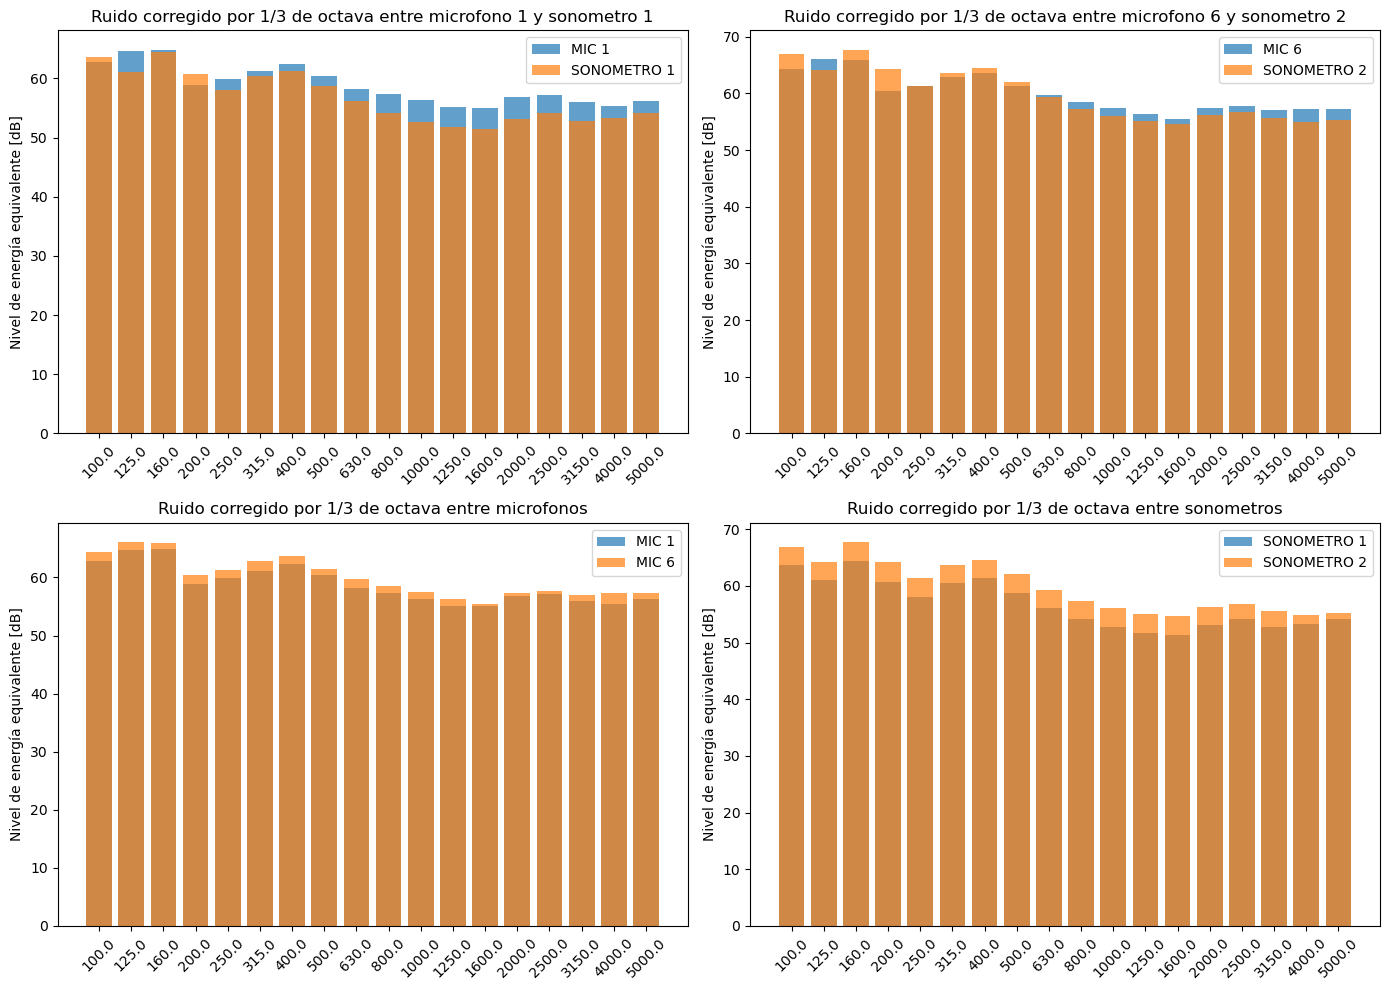

In [41]:
#aplico correcion
avg_thirds_m1_rr_corr = avg_thirds_rr_mic1 - reduccion_tercios
avg_thirds_m6_rr_corr = avg_thirds_rr_mic6 - reduccion_tercios
avg_thirds_s1_rr_corr = avg_thirds_rr_s1 - reduccion_tercios
avg_thirds_s2_rr_corr = avg_thirds_rr_s2 - reduccion_tercios

#datos para graficar
mic1_thirds_leq_plot = {"leq":avg_thirds_m1_rr_corr, "label": "MIC 1"} 
s1_thirds_leq_plot = {"leq":avg_thirds_m6_rr_corr, "label": "SONOMETRO 1"} 
mic6_thirds_leq_plot = {"leq":avg_thirds_s1_rr_corr, "label": "MIC 6"} 
s2_thirds_leq_plot = {"leq":avg_thirds_s2_rr_corr, "label": "SONOMETRO 2"} 

titles={
    "1": "Ruido corregido por 1/3 de octava entre microfono 1 y sonometro 1", 
    "2": "Ruido corregido por 1/3 de octava entre microfono 6 y sonometro 2", 
    "3": "Ruido corregido por 1/3 de octava entre microfonos", 
    "4": "Ruido corregido por 1/3 de octava entre sonometros"
}

plot_m1_s1_thirds = lambda: plot.plot_leqs(nominal_thirds_central_freqs, mic1_thirds_leq_plot, s1_thirds_leq_plot,  rotate=True, title=titles["1"], show=False)
plot_m6_s2_thirds = lambda: plot.plot_leqs(nominal_thirds_central_freqs, mic6_thirds_leq_plot, s2_thirds_leq_plot,  rotate=True, title=titles["2"], show=False)
plot_m1_m6_thirds = lambda: plot.plot_leqs(nominal_thirds_central_freqs, mic1_thirds_leq_plot, mic6_thirds_leq_plot, rotate=True, title=titles["3"], show=False)
plot_s1_s2_thirds = lambda: plot.plot_leqs(nominal_thirds_central_freqs, s1_thirds_leq_plot, s2_thirds_leq_plot,  rotate=True, title=titles["4"], show=False)

plot.multiplot(plot_m1_s1_thirds, plot_m6_s2_thirds, plot_m1_m6_thirds, plot_s1_s2_thirds, figsize=(14, 10))

Diferencia de piso de ruido y ruido corregido entre sonometros

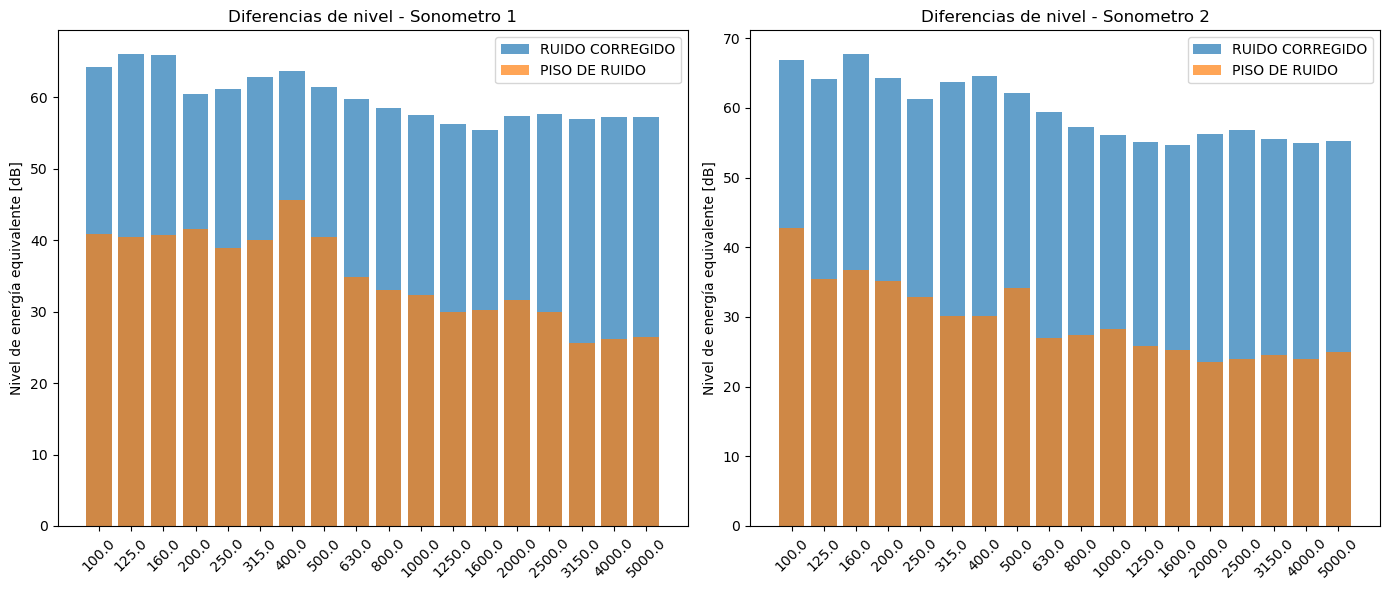

In [42]:
s1_rr_thirds_leq_plot = {"leq":avg_thirds_s1_rr_corr, "label": "RUIDO CORREGIDO"} 
s2_rr_thirds_leq_plot = {"leq":avg_thirds_s2_rr_corr, "label": "RUIDO CORREGIDO"} 
s1_nf_thirds_leq_plot = {"leq":thirds_bands_leq_s1_nf, "label": "PISO DE RUIDO"} 
s2_nf_thirds_leq_plot = {"leq":thirds_bands_leq_s2_nf, "label": "PISO DE RUIDO"} 

titles=["Diferencias de nivel - Sonometro 1", "Diferencias de nivel - Sonometro 2"]

plot_m1_s1_thirds = lambda: plot.plot_leqs(nominal_thirds_central_freqs, s1_rr_thirds_leq_plot, s1_nf_thirds_leq_plot, rotate=True, title=titles[0], show=False)
plot_m6_s2_thirds = lambda: plot.plot_leqs(nominal_thirds_central_freqs, s2_rr_thirds_leq_plot, s2_nf_thirds_leq_plot, rotate=True, title=titles[1], show=False)

plot.multiplot(plot_m1_s1_thirds, plot_m6_s2_thirds, figsize=(14, 6))

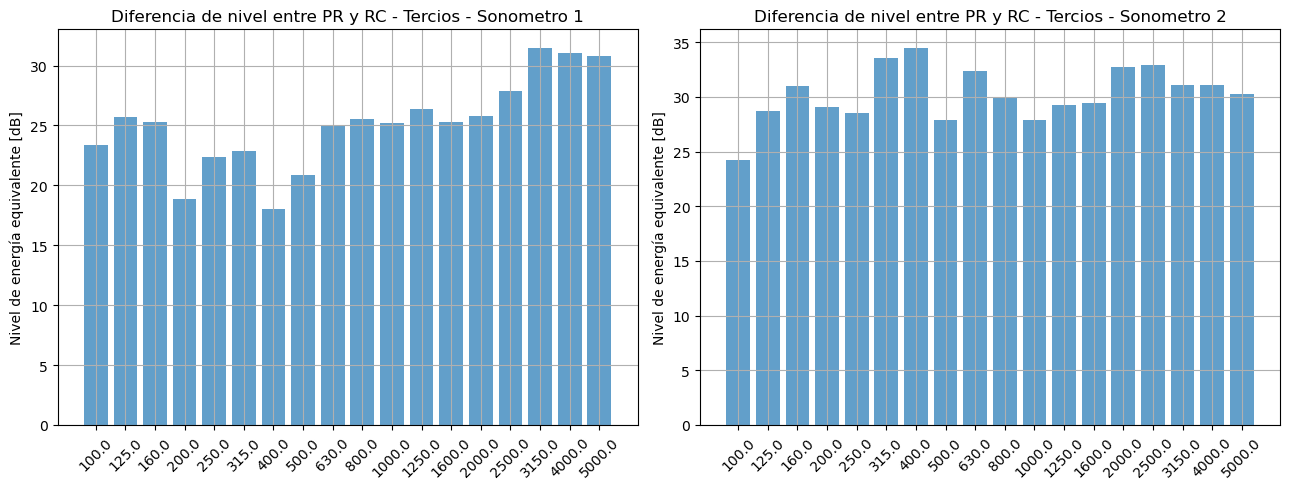

In [43]:
dif_thirds_s1 = avg_thirds_s1_rr_corr - thirds_bands_leq_s1_nf
dif_thirds_s2 = avg_thirds_s2_rr_corr - thirds_bands_leq_s2_nf

dif_thirds_s1_plot_data = {"leq":dif_thirds_s1} 
dif_thirds_s2_plot_data = {"leq":dif_thirds_s2} 

title = ["Diferencia de nivel entre PR y RC - Tercios - Sonometro 1", "Diferencia de nivel entre PR y RC - Tercios - Sonometro 2"]
dif_thirds_s1_plot =  lambda: plot.plot_leqs(nominal_thirds_central_freqs, dif_thirds_s1_plot_data, title=title[0], rotate=True, show=False)
dif_thirds_s2_plot =  lambda: plot.plot_leqs(nominal_thirds_central_freqs, dif_thirds_s2_plot_data, title=title[1], rotate=True, show=False)

plot.multiplot(dif_thirds_s1_plot, dif_thirds_s2_plot, figsize=(13, 5)) 

Nuevamente los resultados indican que no se alcanzaron los 35 dB de diferencia entre ruido emitido por la fuente y ruido por cada banda.

Diferencia total entre piso de ruido y ruido generado por la fuente. Podemos sumar todas las diferencias de nivel sonoro continuo equivalente promedio de las bandas de octavas ya que eso nos dara el LEQ total de la diferencia promedio.

In [ ]:
s_dif_thirds = auf.np.stack((auf.np.array(dif_thirds_s1), auf.np.array(dif_thirds_s2)))
s_avg_dif_thirds = auf.np.mean(s_dif_thirds, axis=0)

dif_avg_total_mics = auf.sum_bands(dif_octaves)
dif_avg_total_sonometers = auf.sum_bands(s_avg_dif_thirds)

totals = {"leq":[dif_avg_total_mics, dif_avg_total_sonometers]}

title="Diferencia total de LEQ"
plot.plot_leqs(["Micrófonos", "Sonómetros"], totals, title=title, info_type="categories", figsize=(6, 5))

NameError: name 'dif_octaves' is not defined

Si bien el último gráfico sugiere que en nivel total de las bandas de análisis superaron los 35 dB por encima del piso de ruido,  los resultados examinados a lo largo del estudio revelan que no se logró alcanzar dicha diferencia en cada banda individualmente, como lo exige la normativa vigente. 

Nuestras hipotésis sobre estas situaciones  constan en que la presencia de ruido blanco en lugar de ruido rosa durante las mediciones condujo a la medición de una mayor cantidad de energía de la deseada. Posteriormente, esta energía adicional se eliminó mediante el uso de filtros de corrección. Además, se detecta que las calibraciones no fueron completamente puras, ya que se registran conversaciones de fondo. Este hallazgo resalta la importancia de considerar con atención los procedimientos de medición y calibración en futuros análisis y mediciones acústicas.

<h1>Respuesta al impulso</h1>

Un "sine sweep" (también denominado "barredor sinusoidal" o "sine wave sweep") y un "sine sweep inverso" constituyen técnicas de relevancia en el ámbito de la medición y calibración de sistemas de audio, así como en la evaluación de la respuesta en frecuencia de estos sistemas. Estas técnicas desempeñan un papel fundamental en la caracterización y, en ciertos contextos, en la corrección de la respuesta en frecuencia de tales sistemas para alcanzar una respuesta plana.

#### Sine Sweep (Barredor Sinusoidal):

El "sine sweep" se configura como una señal de audio que experimenta una variación continua o, en su defecto, dentro de un rango predeterminado de frecuencias durante un intervalo de tiempo especificado. En este proceso, la frecuencia de la señal se incrementa o disminuye de manera lineal o logarítmica a lo largo del período temporal designado. La función principal del "sine sweep" radica en su capacidad para excitar el sistema sometido a prueba, ya sea un altavoz, un micrófono o un sistema de audio, entre otros. El resultado de esta excitación permite la medición precisa de la respuesta en frecuencia del sistema, registrando la salida en función de la frecuencia de entrada.

#### Sine Sweep Inverso:

El "sine sweep inverso" se configura como una variante del "sine sweep" en la que la señal varía en frecuencia de manera inversa a la secuencia de variación en un "sine sweep" convencional. En otras palabras, la frecuencia comienza en un valor alto y disminuye progresivamente a lo largo del tiempo. El "sine sweep inverso" se emplea con el propósito de caracterizar la respuesta en frecuencia de un sistema. A diferencia del "sine sweep" estándar, el "sine sweep inverso" se distingue por su capacidad para aplicar correcciones al sistema, lo que posibilita la consecución de una respuesta en frecuencia plana.

El proceso para obtener una respuesta plana a partir de un "sine sweep" y un "sine sweep inverso" comprende los siguientes pasos:

1) Se reproduce el "sine sweep" a través del sistema que se pretende caracterizar, como un altavoz o un sistema de sonido.

2) Se registra la señal de salida generada por el sistema durante la reproducción.

3) Se procede al análisis de la señal registrada con el propósito de determinar el impacto del sistema en términos de amplitud y fase en relación a las distintas frecuencias presentes en el "sine sweep".

4) Utilizando la información recopilada, se procede al cálculo de una función de corrección inversa, conocida como "filtro inverso", que compense las alteraciones introducidas por el sistema.

5) El filtro inverso se aplica al "sine sweep inverso" y se reproduce a través del sistema. El resultado esperado es una respuesta plana, dado que el filtro inverso contrarresta las modificaciones introducidas por el sistema.

El "sine sweep" y el "sine sweep inverso" representan herramientas fundamentales en el análisis y ajuste de sistemas de audio con el objetivo de obtener una respuesta en frecuencia más uniforme.

A continuación, se presenta el esquema utilizado para la obtención de la respuesta al impulso:

![image.png](imagenes/RIR.png)

#### Obtención de la respuesta al impulso
En primer lugar, haremos el análisis para un sinesweep, y luego la respuesta del sinesweep grabada el dia de la medicion. Para este primer acercamiento usamos la funcion del sineSweep generado en la medición y graficamos su respuesta en frecuencia.

In [ ]:
sinesweep , t= cm.sineSweep(duration=25, init_f = 30, end_f = 8000)

In [ ]:
plot.plot_fft(sinesweep, sample_rate=48000, title="Respuesta en frecuencia del sineSweep logarítmico")

Luego generamos y graficamos la respuesta en frecuencia del sineSweep inverso, con el filtro inverso aplicado respectivamente al sinesweep anterior.

In [ ]:
invsweep = auf.inversesweep(sinesweep, 30, 8000, sr=48000)

In [ ]:
plot.plot_fft(invsweep, sample_rate=48000, title="Respuesta en frecuencia del sineSweep logarítmico")

De manera que para generar una respuesta al impulso, como además una respuesta plana en funcion de la frecuencia, se convolucionan la señal de sinsweep con su inverso calculado, que para este caso, termina siendo una delta (sinc). 

In [ ]:
from scipy.signal import fftconvolve

RI = fftconvolve(sinesweep,invsweep)

plot.plot_fft(RI, sample_rate=48000, title="Respuesta en frecuencia de la convolucion")

De esa forma, obteniendo una respuesta en frecuencia plana, sabemos que la representacion temporal de la señal que obtiene esa respuesta es una delta. Por lo que podemos pensar que al realizar las grabaciones en los puntos de medicion a partir del sinesweep generado, luego podemos hacer la convolucion del mismo sinsweep inverso y de esa forma obtenemos la respuesta al impulso del recinto en cada punto de su ubicación.

Sabemos que no podemos obtener una respuesta al impulso que caracterice al recinto haciendo el promedio de los mismos, ya que cada una de las RIR tiene su propia magnitud en cada instante y depende directamente de la distancia respecto a la fuente. Es decir que si movemos la fuente o microfono, vamos a obtener una "respuesta al impulso promedio" diferente, ya que las señales se desfasan temporalmente y el promedio resultante siempre va a ser distinto.

#### Obtención y análisis RIR del recinto

Luego de este análisis, en un primer paso de análisis, decidimos tomar una única respuesta al impulso específica para realizar comparaciones específicas y la auralización posteriormente. Las RIR elegida es la generada a partir de la ubicación del micrófono 3, ya que creemos que representa una ubicación típica del aula para el uso regular de la misma, de un estudiante escuchando a su profesor. Además, al tener que elegir una grabación de una de las 2 fuentes sonoras, tomamos la grabación de la posición dicha, pero con la fuente sonora en la posicion 2, dado que nos pareció la posicion mas habitual de un profesor en un aula, y coinciría con lo que se suele escuchar en el dia a dia. Por lo que, a continuacion, analizaremos las RIR del Micrófono 3 en el caso sin gente en el recinto y excitada con la fuente 2. 

Luego de obtener la respuesta al impulso, para todo punto de medición, lo filtraremos con un filtro pasa banda de orden 4, en las frecuencias de corte 89 Hz y 5656 Hz, ya que equivale a la frecuncia de corte de tercio de octava inferior y superior para las frecuencias establecidas en la norma ISO 3382-2, las cuales son 100 Hz y 5000 Hz para banda de tercios de octava. Utilizamos estos valores de frecuencias laterales y un orden de nivel 4, ya que son las frecuencias utilizadas en el análisis espectral. 
El rango de las frecuencias de las señales está tenida en cuenta en términos de la norma para el método de medición seleccionado.

In [ ]:
# MIC 3 - FUENTE 2 - SIN GENTE

sweep_path_SG = auf.get_paths("Paths.xlsx", "SS 30 - 8K - F2 - SG")
signal_3, fs_3 = auf.load_audio(sweep_path_SG[2])

#Cargo la señal sineSweep usada en la medicion para el inverso
sweep_ref, fs = auf.sf.read("audios/Audios de Grabaciones/seno_logaritmico_25seg_30-8K.wav")

#Obtengo la respuesta al impulso y la filtro con un pasa banda
#Aplico las frecuencias de entrada 30 y 8000Hz para tener las frecuencias que generen el filtro inverso para la convolución posterior.
rir_3_SG = auf.get_rir(signal_3, sweep_ref, 30, 8000, fs)
rir_3_SG = auf.rir_filt(rir_3_SG)

#Cargo el audio a auralizar
voice, fs= auf.sf.read("audios/anechoic_voice_48.wav")
voice_mono = auf.to_mono(voice)

#Consigo el time array de cada rir para graficar, y grafico
dur_SG, t_rir3_SG = auf.get_audio_time_array(rir_3_SG, fs)


In [ ]:
plot.plot_signal([t_rir3_SG, rir_3_SG], title="Representacion temporal | RIR Mic 3 | Sin Gente", grid=True)

En este caso podemos observar la respuesta al impulso lograda por la convolución de la respuesta al sinesweep generado con el inverso del mismo. Y se puede ver que tiene una caida no ideal como el que generamos de forma sintética en el trabajo anterior, con una envolvente decreciente, sino que tiene alti bajos a lo largo del tiempo. Además de que la amplitud en donde se estabiliza la señal en el tiempo es de un nivel muy menor, siendo éste el piso de ruido registrado en la sala ese día.

Podemos analizar una aproximación rapida de la caida de energía para saber cuando decae en tiempo la misma, y analizar su T60 aproximado en ese punto. 

In [ ]:
rir_3_SG_dB = 10 * auf.np.log10((rir_3_SG)**2)

plot.plot_signal([t_rir3_SG, rir_3_SG_dB], title="Representacion de energía | RIR Mic 3 | Sin Gente", grid=True, figsize=(8,5), dB=True, plot_type = "ED", yticks=auf.np.arange(0, -201, -20), xticks=1)

Lo que podemos apreciar en el grafico de caída de energia en fuuncion del tiempo, es que en a decaimiento de 60 dB, se  produce en un tiempo de aproximadamente 0.47 segundos. Lo que está muy próximo al valor obtenido en la ecuacion de Sabine, que fue de 0.6 segundos, al calcular la superficie total del aula con sus coeficientes de absorción correspondiente. Esto es una primera aproximación y solo corresponde al punto de medición del micrófono 3, lo que cual no nos dice cual es el T60 del reciento en general.

#### Comparación RIR 3 (SG-CG)

A continuación generaremos el RIR del micrófono 3 con la fuente 2, pero esta vez con gente dentro del recinto, para hacer las comparaciones de las respuestas al impulso en esa posicion con los diferentes casos de medición, con gente (CG) y sin gente (SG) en el recinto.

In [ ]:
# MIC 3 - FUENTE 2 - CON GENTE

sweep_path_CG = auf.get_paths("Paths.xlsx", "SS 30 - 8K - F2 - CG")
signal_3, fs_3 = auf.load_audio(sweep_path_CG[2])

#Uso la señal sineSweep usada en la medicion para el inverso ya cargada previamente

rir_3_CG = auf.get_rir(signal_3, sweep_ref, 30, 8000, fs)
rir_3_CG = auf.rir_filt(rir_3_CG)

#Consigo el time array de cada rir para graficar
dur_CG, t_rir3_CG = auf.get_audio_time_array(rir_3_CG, fs)

Hacemos un análisis comparativo entre los gráficos de los RIR en funcion del tiempo para ambos casos de medición.

In [ ]:
#Concateno para generar subplot
rir_CG_SG = []
rir_CG_SG = [rir_3_SG, rir_3_CG]

#Grafico 
plot.rir_subplot(rir_CG_SG, t_rir3_CG, plot_type="SG-CG")

Podemos observar que entre ambos casos, prácticamente no hay diferencias gráficas, tanto en los picos de amplitud notadas como por la caida de amplitud en tiempo, por lo que esperaríamos que en la auralización no se note mucha diferencia entre ambos casos, lo que se analizará mas adelante.

#### Análsis de las 12 RIR

Luego podemos analizar las diferentes respuestas al impulso en las 6 posiciones de micrófono, con las distintas combinaciones entre las dos fuentes, en el caso del aula sin gente (SG), para tener las 12 combinaciones requeridas para el método de medición de precisión, según la norma ISO 3382-2. Obtenemos los audios de cada grabacion para cada punto, del mismo método anterior, utilizando la inversa del sinsweep generado el día de la medición, obtenemos la respuesta al impulso correspondiente a cada punto de medición.

In [ ]:
# ---- 12 RIRS SG ----

#Cargo los path de los archivos

sweep_pathF1 = auf.get_paths("Paths.xlsx", "SS 30 - 8K - F1 - SG")
sweep_pathF2 = auf.get_paths("Paths.xlsx", "SS 30 - 8K - F2 - SG")
#Entrega listas de los audios
sweep1_fs, sweep_F1_wav = auf.get_signals(sweep_pathF1)
sweep2_fs, sweep_F2_wav = auf.get_signals(sweep_pathF2)

#Uso la señal sineSweep usada en la medicion para el inverso ya cargada previamente

#Devuelve los rirs empaquetados
rirs_F1 = auf.get_rirs(sweep_F1_wav, sweep_ref, 30, 8000, fs)
rirs_F2 = auf.get_rirs(sweep_F2_wav, sweep_ref, 30, 8000, fs)

#Junto los rirs de ambas fuentes
rirs_SG = auf.np.concatenate((rirs_F1, rirs_F2))

#Sumo todas las rir para obtener array de tiempo
sum_rirs_SG = auf.prom_rirs(rirs_SG)

none, t = auf.get_audio_time_array(sum_rirs_SG, fs)

#Grafico las 12 combinaciones de RIRs
plot.rir_subplot(rirs_SG, t, case="SG")

En el gráfico anterior, podemos observar las respuestas al impulso de obtenidas desde la convolucion del sinesweep inverso con la respuesta al sinesweep del dia de la medicion en cada punto diferente de posicionamiento de los micrófonos, donde se ve una diferencia de caída en la envolvente de algunas respuestas al impulso, pero no hay una diferencia significativa en tiempo para las diferentes posiciones. Podemos comparar los RIR en el caso del aula con gente (CG), de forma análoga a la anterior.

In [ ]:
# ---- 12 RIRS CG ----

#Cargo los path de los archivos

#Para diferentes fuentes
sweep_pathF1 = auf.get_paths("Paths.xlsx", "SS 30 - 8K - F1 - CG")
sweep_pathF2 = auf.get_paths("Paths.xlsx", "SS 30 - 8K - F2 - CG")

#Entrega listas de los audios
sweep1_fs, sweep_F1_wav = auf.get_signals(sweep_pathF1)
sweep2_fs, sweep_F2_wav = auf.get_signals(sweep_pathF2)

#Uso la señal sineSweep usada en la medicion para el inverso ya cargada previamente

#Devuelve los rirs empaquetados
rirs_F1 = auf.get_rirs(sweep_F1_wav, sweep_ref, 30, 8000, fs)
rirs_F2 = auf.get_rirs(sweep_F2_wav, sweep_ref, 30, 8000, fs)

#Junto los rirs de ambas fuentes
rirs_CG = auf.np.concatenate((rirs_F1, rirs_F2))

#Sumo todas las rir 
sum_rirs_CG = auf.prom_rirs(rirs_CG)

none, t = auf.get_audio_time_array(sum_rirs_CG, fs)

#Grafico las 12 combinaciones de RIRs
plot.rir_subplot(rirs_CG, t, case="CG")

Igualmente que el caso anterior podemos observar poca diferencia de decaimiento en funcion del tiempo de la amplitud en diferentes medidas para cada posición. Además podemos ver que para ambos casos de la medición, con gente y sin gente en el recinto, hay una mínima diferencia entre cada RIR correspondientes a su ubicación, que es menor a la diferencia entre RIRs de diferentes ubicaciones entre sí.

#### Respuesta en frecuencia - RIR posición 3 

Volviendo a las respuestas al impulso en el punto de medición del microfono 3, analizaremos como varía en relación a la frecuencia en los diferentes casos. Para ello, podemos analizar la respuesta en frecuencia de ambos RIRs para ambos casos tomados, con y sin gente en el recinto.

In [ ]:
plot.plot_mult_fft(rir_3_SG, rir_3_CG, fs, N = 50, title="Comparacion de Respuesta en Frecuencia entre RIR SG y CG")

- Podemos notar varias puntos viendo el gráfico comparativo. Como primer punto, podemos notar que las frecuencias minimas y maximas coinciden con las frecuencias elegidas al haber aplicado el sinesweep generado en la medicion, desde 30Hz hasta 8kHz, donde además se puede ver la atenuación aplicado por el filtro en los límites de las frecuencias anteriores.

- Como otro punto, podemos notar que hay variaciones en amplitud con respecto a la frecuencia pero mantiene el patrón de cierta manera. Pero cabría esperar que con la presencia de personas en el aula, al también actuar como un absorbente más dentro del aula, se produzca un mayor decaimiento en las altas frecuencias. No obstante, solo observamos una caída significativa alrededor de los 2500 Hz, lo cual pensamos que no se notarán grandes cambios en la auralización en el análisis para ambos casos.

#### Auralización

Finalmente, procederemos a realizar la auralización. La auralización implica la reproducción o simulación del sonido característico del espacio acústico en cuestión utilizando la respuesta al impulso, en el punto espacial donde se tomó dicha medición. Esto se logra mediante la convolución de una señal de entrada con la respuesta al impulso requerida.

En este caso, emplearemos una voz anecoica para apreciar las diferencias al realizar la convolución con la respuesta al impulso generada.

In [ ]:
#Cargo la voz a auralizar
voice, fs= auf.sf.read("audios/anechoic_voice_48.wav")

#Voz anecóica original
voice_mono = auf.to_mono(voice)

#Reproduzco el audio original anecóico
auf.play_mono_audio(voice_mono, fs)

Para un primer análisis, generaremos la auralización con la RIR en ubicacion del micrófono 3 del recinto sin gente (SG) aplicada de la fuente 2, la cual es la misma que analizamos anteriormente.

In [ ]:
#Auralizo la voz con la RIR 3 SG
aur_SG = auf.aural(voice_mono, rir_3_SG, fs)

#Guardo el audio de la voz auralizada del caso sin gente en el recinto
auf.save_audio("audios/voice_aur_M3_SG.wav", aur_SG)
#Reproduzco el audio auralizado
auf.play_mono_audio(aur_SG, fs)


Podemos apreciar un ambiente sonoro que ha sido generado mediante la convolución entre la Respuesta al Impulso de la ubicación 3 (RIR 3) y el audio grabado en la posición del micrófono 3 con la Fuente 2. 
El ambiente sonoro generado, se acerca a lo que uno esperaría por el recinto seleccionado, excepto por la falta de agudos en la reproducción, pero lo atribuimos a que en la respuesta en frecuencia solo alcanza hasta los 8kHz, y no tendría componentes en mayores frecuencias.

Luego, generamos la auralización para el caso del recinto con gente (CG) para hacer una comparación entre la auralizacion anterior (SG).

In [ ]:
#Auralizo la voz con la RIR 3 CG
aur_CG = auf.aural(voice_mono, rir_3_CG, fs)

#Guardo el audio de la voz auralizada del caso con gente en el recinto
auf.save_audio("audios/voice_aur_M3_CG.wav", aur_CG)

#Reproduzco el audio auralizado
auf.play_mono_audio(aur_CG, fs)

Como habiamos previsto según el grafico de respuesta en frecuencia anterior, no hay grandes diferencias sonoras entre la auralización de la RIR 3 para los diferentes casos del recinto, con gente y sin gente. 

Por último podemos realizar un análisis temporal de la señal, antes y después de realizar la auralización. Para este caso tomamos el RIR 3 del caso sin gente en el recinto.

In [ ]:
#Agrego un segundo de tiempo al array para tener una buena comparación gráfica
num_samples = int(fs * 1)
vector_ceros = auf.np.zeros(num_samples)
voice_mono = auf.np.concatenate((voice_mono, vector_ceros))

#Consigo el time array de la voz original
dur, t_voice = auf.get_audio_time_array(voice_mono, fs)


plot.plot_signal([t_voice, voice_mono], grid=True, title="Audio de voz original", figsize=(12,3), xticks=20)

#Consigo el time array de la voz auralizada
dur, t_aur = auf.get_audio_time_array(aur_SG, fs)
#Grafico la señal
plot.plot_signal([t_aur, aur_SG], grid=True, title="Audio de voz auralizada", figsize=(12,3), xticks=20)

Podemos observar una variación en la señal a lo largo del tiempo, lo cual es equivalente a lo que percibimos en la auralización. En el caso del audio auralizado, esta variación temporal reflejará el ambiente y las características acústicas del espacio.

#### Comparación RIR 2 - RIR 3

Como un último análisis de las respuestas al impulso, analizaremos la diferencia del decaimiento en el tiempo entre diferentes puntos de posicionamientos y como afecta a una auralización. Por ejemplo, pudimos ver en el gráfico anterior de las 12 RIRs diferentes, que la RIR en la posicion 3 y el de la posicion 2 del micrófono, tienen una mayor diferencia en su decaimiento de amplitud en funcion del tiempo. 
Por lo que analizaremos las dos respuestas al impulso excitadas con el sinesweep desde la fuente 2, ya que es la que mayor diferencias temporales muestra, además de la auralizacion para cada una de ellas.

In [ ]:
# MIC 3 - FUENTE 2 - SIN GENTE | Ya cargado anteriormente

# MIC 2 - FUENTE 2 - SIN GENTE

sweep_path_SG = auf.get_paths("Paths.xlsx", "SS 30 - 8K - F2 - SG")
signal_2, fs_2 = auf.load_audio(sweep_path_SG[1])

rir_2_SG = auf.get_rir(signal_2, sweep_ref, 30, 8000, fs)
rir_2_SG = auf.rir_filt(rir_2_SG)
#El array en tiempo es el mismo para ambos RIRs

#Grafico cada RIRs para comparación

titles = ["Representacion temporal | RIR Mic 3 | Sin Gente", "Representacion temporal | RIR Mic 2 | Sin Gente"]

#plot_m3_rir = lambda: plot.plot_signal([t_rir3_SG, rir_3_SG], grid=True, title=titles[0], show=False)
#plot_m2_rir = lambda: plot.plot_signal([t_rir3_SG, rir_2_SG], grid=True, title=titles[1], show=False)

#plot.multiplot(plot_m3_rir, plot_m2_rir)
rir_3_2 = [rir_3_SG, rir_2_SG]
plot.rir_subplot(rir_3_2, t_rir3_CG,  title = titles, plot_type="2-RIR")

En este caso, se puede notar una mayor diferencia de amplitud en funcion del tiempo entre ambas RIR, por lo que podemos pensar que hay una mayor perdida de energia en un menor tiempo para el RIR en la posición 2, por lo que se traduce en una auralización menos reverberante que la RIR de posicion 3 que se analizó previamente.

Realizaremos la auralizacion de ambos, y la representacion temporal de cada uno para su comparación.

In [ ]:
#Auralizo la voz con la RIR 3 SG
aur3_SG = auf.aural(voice_mono, rir_3_SG, fs)

#Reproduzco el audio auralizado
auf.play_mono_audio(aur3_SG, fs)


In [ ]:
#Auralizo la voz con la RIR 2 SG
aur2_SG = auf.aural(voice_mono, rir_2_SG, fs)

#Guardo la auralizacion con RIR 2 SG
auf.save_audio("audios/voice_aur_M2_SG.wav", aur2_SG)

#Reproduzco el audio auralizado
auf.play_mono_audio(aur2_SG, fs)

In [ ]:
#Consigo el time array de la auralizacion del RIR 3
dur, t_aur3 = auf.get_audio_time_array(aur3_SG, fs)
plot.plot_signal([t_aur3, aur3_SG], grid=True, title="Audio de voz auralizada | RIR 3", figsize=(12,3), xticks=20)

#Consigo el time array de la auralizacion del RIR 2
dur, t_aur2 = auf.get_audio_time_array(aur2_SG, fs)
#Grafico la señal
plot.plot_signal([t_aur2, aur2_SG], grid=True, title="Audio de voz auralizada | RIR 2", figsize=(12,3), xticks=20)

En este caso, sí podemos notar menor diferencia con respecto a las comparaciones anteriores, lo que pensamos que puede atribuir a que el ambiente, con la RIR 2, tenga un menor tiempo de reverberación. 
Se puede notar que en la auralización para la RIR en la posicion 2, la señal presenta un menor contenido señal en funcion del tiempo, como tambien picos o amplitudes que en la otra representacion temporal no tenia, que eso eventualmente se termina traduciendo en una diferente escucha en una auralización.

#### Conclusión Respuesta al impulso

Luego de nuestros análisis con las diferentes respuestas al impulso tanto para ambos casos de medición tomados como para las diferentes posiciones, hemos podido comprobar el concepto fundamental de la respuesta al impulso, entendiendo cómo esta representación contiene toda la información de un sistema lineal invariante en el tiempo (LTI). Pudimos observar que cuando la voz que se grabó en un entorno sin reflexiones, adquiere una caracterización específica que estaba contenida en la respuesta al impulso construida por medio de la convolucion de la respuesta al sinesweep generado el día de la medición con la inversa del mismo. Por otra parte, podemos decir que a pesar de las diferencias de amplitud en funcion del tiempo de cada RIR no afecta de manera significativa en terminos de una auralización, por lo que podemos pensar que su T60 ronda dentro de unos tiempos cercanos. Pero para su cálculo exacto se necesitan hacer otras aproximaciones y métodos que se tendrán en cuenta para otro trabajo.

# 4. Muestreo

Se pide desarrollar algunas señales teniendo en cuenta la técnica "sin_lookup.csv" para ahorrar recursos de procesamiento y por lo tanto tiempo. En principio se piden desarrollar 3 senoidales, una con frecuencia 125 Hz, 1000 Hz y 1500 Hz y graficarlas en tiempo y frecuencia. Luego, se piden generar un tono de 4000 Hz, de 12 kHz y otro de 20 kHz con 1 segundo de duración. Por último, se pide sumar los 3 tonos, calcular el espectro de magnitud de la suma, graficar y sacar concluciones.

In [ ]:
import muestreo as ms
import pandas as pd   
import matplotlib.pyplot as plt
from IPython.display import Audio 

#frecuencias para gráficar en tiempo y frecuencia.
frecuencia_1 = 125
frecuencia_2 = 1000
frecuencia_3 = 1500
#frecuencias para generar tono.
frecuencia_4 = 4000
frecuencia_5 = 12000
frecuencia_6 = 20000

duracion = 1
tabla_seno = pd.read_csv("sin_lookup.csv")

seno_1 = ms.gen_sin_table(duracion, frecuencia_1, tabla_seno)
seno_2 = ms.gen_sin_table(duracion, frecuencia_2, tabla_seno)
seno_3 = ms.gen_sin_table(duracion, frecuencia_3, tabla_seno)
seno_4 = ms.gen_sin_table(duracion, frecuencia_4, tabla_seno)
seno_5 = ms.gen_sin_table(duracion, frecuencia_5, tabla_seno)
seno_6 = ms.gen_sin_table(duracion, frecuencia_6, tabla_seno)

In [ ]:
#Señal senoidal de 125Hz en tiempo.
plot.cont_signal_ploter(seno_1[0], seno_1[1], labels = ("Tiempo [s]","Amplitud"), xlimits = (0, 2/125), ylimits = (None, None), xscale = "linear", yscale = "linear", x_mathtext = False, y_mathtext = False, x_ticks = (None), y_ticks = (None), title = "", col = "#1f77b4", grid = True, size = (8, 4), save = False, file_name = "mi_grafico", image_dpi = 200)

In [ ]:
#Señal senoidal de 125Hz en frecuencia.
plot.plot_fft(16000, seno_1[1])

In [ ]:
#Señal senoidal de 1000Hz en tiempo.
plot.cont_signal_ploter(seno_2[0], seno_2[1], labels = ("Tiempo [s]","Amplitud"), xlimits = (0, 2/1000), ylimits = (None, None), xscale = "linear", yscale =

In [ ]:
#Señal senoidal de 1000Hz en frecuencia.
plot.plot_fft(16000, seno_2[1])

In [ ]:
#Señal senoidal de 1500Hz en tiempo.
plot.cont_signal_ploter(seno_3[0], seno_3[1], labels = ("Tiempo [s]","Amplitud"), xlimits = (0, 2/1500), ylimits = (None, None), xscale = "linear", yscale = "linear", x_mathtext = False, y_mathtext = False, x_ticks = (None), y_ticks = (None), title = "", col = "#1f77b4", grid = True, size = (8, 4), save = False, file_name = "mi_grafico", image_dpi = 200)

In [ ]:
#Señal senoidal de 1500Hz en frecuencia.
plot.fft_ploter(16000, seno_3[1])

In [ ]:
#Audio de señal de 4000Hz.
Audio(seno_4[1],rate=16000)

In [ ]:
#Audio de señal de 12000Hz.
Audio(seno_5[1],rate=16000)

In [ ]:
#Audio de señal de 20000Hz.
Audio(seno_6[1],rate=16000)

In [ ]:
#Señal senoidal de 4000Hz en frecuencia.
plot.fft_ploter(16000, seno_4[1])

In [ ]:
#Señal senoidal de 12000Hz en frecuencia.
plot.fft_ploter(16000, seno_5[1])

In [ ]:
#Señal senoidal de 20000Hz en frecuencia.
plot.fft_ploter(16000, seno_6[1])

In [ ]:
#suma de tonos: (4000+12000+20000)Hz
suma_de_tonos = seno_4[1] + seno_5[1] + seno_6[1]

In [ ]:
plot.fft_ploter(16000, suma_de_tonos)

CONCLUSION:
los tonos de 12000 y 20000 Hz estan por encima de la frecuencia de Nyquist produciendo artefactos uqe particularmente por ser multiplos de 4000Hz replican esta señal en cada una de las oportunidades. esto se observa en los espectros de cada señal y en la suma, asi como en los audios generados que son identicos

Otra forma que se nos ocurrió para obtener funciones senoidales a partir de la look_up_table, es generar un seno base con la tabla y escalar el vector temporal multiplicandolo por un escalar. De esta forma, la cantidad de muestras se mantiene igual pero el tiempo en el que se realiza cada salto. Por ejemplo si genero una senoidal de 1000 Hz, al multiplicar el vector termporal por 2, se duplica la distancia entre cada tiempo, por lo que su frecuencia disminuye. Si en cambio multiplicamos por un 1/2, la distancia temporal entre un punto y otro disminuye a la mitad por lo que su frecuencia aumenta. De esta forma podemos pensar en una frecuencia de sampleo grafica (siempre y cuando la grafica sea amplitud vs tiempo). Al aumentar la frecuencia se produce una disminución en la duración, y si agregamos ciclos de dicha función para llegar a la duración deseada aumentan exponencialmente la cantidad de muestras, disminuyendo la eficiencia. Se puede pensar en eliminar cantidad de muestras para que se mantenga la misma frecuencia de sampleo. Aún así, por nyquist no se podrían graficar las señales solicitadas.